<a href="https://colab.research.google.com/github/Kasula-Lohith-Kumar/ScalerProjects/blob/main/OLABusinessCaseEnsembleModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/0f/Ola_Cabs_logo.svg/1920px-Ola_Cabs_logo.svg.png">
        </td>
        <td>
            <div align="center">
              <font color="black" size="8"><span><b>Business</b></span></font><font color="black" size="8"><span><b>Case</b></span></font>
                <br>
                <br>
                <br>
                <font color="b7cd26" size="4">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>

---
#<font color="b7cd26"><span><b>Context :</b></span></font>

Ola is an Indian-origin company primarily known for its ride-hailing services, similar to companies like Uber. Founded in 2010 by Bhavish Aggarwal and Ankit Bhati, Ola (officially ANI Technologies Pvt. Ltd.) started as a cab aggregator, offering users a convenient way to book rides via a mobile app. Ola quickly grew to become one of the largest ride-hailing platforms in India and expanded internationally to countries such as Australia, New Zealand, and the United Kingdom.

***Ola's business focus and areas:***
* Ride-Hailing Services
* Ola Electric
* Financial Services
* Ola Foods
* Technology and Innovation

Ola's primary business is still ride-hailing, though it is diversifying into electric mobility and financial services as potential growth areas. This case study will focus on ***Ride-Hailing Services*** only

---
#<font color="b7cd26"><span><b>Problem Statement:</b></span></font>

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

___
#<font color="#b7cd26"><span><b>Column Profiling :</b></span></font>




|<font size=4 color=black>Feature|<font size=4 color=black>Description|
|-|-|
|<font size=2>**MMMM-YY**|<font size=2>Reporting Date (Monthly)|
|<font size=2>**Driver_ID**|<font size=2>Unique ID for drivers|
|<font size=2>**Age**|<font size=2>Age of the driver|
|<font size=2>**Gender**|<font size=2>Gender of the driver – Male : 0, Female : 1|
|<font size=2>**City**|<font size=2>City Code of the driver|
|<font size=2>**Education_Level**|<font size=2>Education level – 0 for 10+, 1 for 12+, 2 for graduate|
|<font size=2>**Income**|<font size=2>Monthly average income of the driver|
|<font size=2>**Date Of Joining**|<font size=2>Joining date for the driver|
|<font size=2>**LastWorkingDate**|<font size=2>Last date of working for the driver|
|<font size=2>**Joining Designation**|<font size=2>Designation of the driver at the time of joining|
|<font size=2>**Grade**|<font size=2>Grade of the driver at the time of reporting|
|<font size=2>**Total Business Value**|<font size=2>The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)|
|<font size=2>**Quarterly Rating**|<font size=2>Quarterly rating of the driver: 1, 2, 3, 4, 5 (higher is better)|

___
#<font color="#b7cd26"><span><b>Modelling Techniques Used :</b></span></font>

* ***Ensemble Learning- Bagging***

* ***Ensemble Learning- Boosting***

* ***KNN Imputation of Missing Values***

* ***Working with an imbalanced dataset***

___
#<font color="#b7cd26"><span><b>Installing and Importing all the required Libraries:</b></span></font>

In [ ]:
!pip install colorama
!pip install category_encoders
!pip install -U scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_rel, chi2, chi2_contingency, chisquare, \
f_oneway, spearmanr, pearsonr, norm, shapiro, kstest
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from colorama import Fore, Back, Style
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, accuracy_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import calendar
import datetime as dt
from scipy.stats import uniform

---
#<font color="#b7cd26"><span><b>Mounting Google Drive </b></span></font>

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
drive.mount('/content/drive', force_remount=True)
df_ola = pd.read_csv('/content/drive/MyDrive/BusinessCases/DataSets/OLA-BusinessCase/ola_driver.csv', parse_dates=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'])
pd.set_option('display.max_columns', 30)
original_df = df_ola.copy()
df_ola.head()

Mounted at /content/drive


Unnamed: 0     MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0 2019-01-01          1  28.0     0.0  C23                2   
1           1 2019-02-01          1  28.0     0.0  C23                2   
2           2 2019-03-01          1  28.0     0.0  C23                2   
3           3 2020-11-01          2  31.0     0.0   C7                2   
4           4 2020-12-01          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387    2018-12-24             NaT                    1      1   
1   57387    2018-12-24             NaT                    1      1   
2   57387    2018-12-24      2019-03-11                    1      1   
3   67016    2020-11-06             NaT                    2      2   
4   67016    2020-11-06             NaT                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

___
#<font color="#b7cd26"><span><b>Defining Custom functions</b></span></font>

In [ ]:
def print_unique_values(dataframe, features):
  for _ in features:
    print(f'{Fore.GREEN}+-'*50)
    print(f'{Fore.RED}{_}:')
    if dataframe[_].dtype == 'category':
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {len(dataframe[_].cat.categories.values)}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].cat.categories.values}')
    else:
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {dataframe[_].nunique()}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].unique()}')

___
#<font color="#b7cd26"><span><b>Data Cleaning</b></span></font>

___
##<font color="9e1d73"><span><b>Removing Duplicated Columns</b></span></font>

In [ ]:
df_ola.drop(df_ola.columns[0], inplace=True, axis=1)

___
##<font color="9e1d73"><span><b>Fixing Improper Column Names</b></span></font>


In [ ]:
df_ola.rename(columns={'MMM-YY': 'MonthlyReportingDate'}, inplace=True)

---
##<font color="9e1d73"><span><b>Handling Datetime Features</b></span></font>


---
###<font color="3a86a2"><span><b>Breakdown: year, month, day</b></span></font>

In [ ]:
dates_features = ['MonthlyReportingDate', 'Dateofjoining', 'LastWorkingDate']
id_feature = 'Driver_ID'
features = []
features.extend(dates_features)
features.append(id_feature)
dates_df = df_ola[features]
dates_df.head()

MonthlyReportingDate Dateofjoining LastWorkingDate  Driver_ID
0           2019-01-01    2018-12-24             NaT          1
1           2019-02-01    2018-12-24             NaT          1
2           2019-03-01    2018-12-24      2019-03-11          1
3           2020-11-01    2020-11-06             NaT          2
4           2020-12-01    2020-11-06             NaT          2

---
###<font color="3a86a2"><span><b>Enhancing the 'LastWorkingDate' column through feature engineering for better predictive insights</b></span></font>

In [ ]:
grp_dates_df = dates_df.groupby('Driver_ID').aggregate({'LastWorkingDate':'max'})
grp_dates_df.reset_index(inplace=True)
merged_dates_df = pd.merge(dates_df.drop(columns='LastWorkingDate'), grp_dates_df, on ='Driver_ID', how='left')
merged_dates_df.head()

MonthlyReportingDate Dateofjoining  Driver_ID LastWorkingDate
0           2019-01-01    2018-12-24          1      2019-03-11
1           2019-02-01    2018-12-24          1      2019-03-11
2           2019-03-01    2018-12-24          1      2019-03-11
3           2020-11-01    2020-11-06          2             NaT
4           2020-12-01    2020-11-06          2             NaT

---
###<font color="3a86a2"><span><b>Creating the target feature through feature engineering by using 'LastWorkingDate' </b></span></font>

In [ ]:
merged_dates_df['Churned'] = ~merged_dates_df['LastWorkingDate'].isna()
merged_dates_df['Churned'] = merged_dates_df['Churned'].astype('int')
merged_dates_df.drop(columns= 'LastWorkingDate', axis=1, inplace=True)
merged_dates_df.head()

MonthlyReportingDate Dateofjoining  Driver_ID  Churned
0           2019-01-01    2018-12-24          1        1
1           2019-02-01    2018-12-24          1        1
2           2019-03-01    2018-12-24          1        1
3           2020-11-01    2020-11-06          2        0
4           2020-12-01    2020-11-06          2        0

---
###<font color="3a86a2"><span><b>Enhancing the 'MonthlyReportingDate' and 'Dateofjoining' column through feature engineering for better predictive insights</b></span></font>

In [ ]:
warnings.filterwarnings('ignore')
date_columns = {'MonthlyReportingDate':'MRD', 'Dateofjoining':'DOJ'}
for k, v in date_columns.items():
  merged_dates_df.loc[:, f'{v}_Month'] = pd.to_datetime(merged_dates_df.loc[:,k]).dt.month
  merged_dates_df.loc[:, f'{v}_Year'] = pd.to_datetime(merged_dates_df.loc[:,k]).dt.year
merged_dates_df.drop(columns=date_columns, axis=1, inplace=True)
merged_dates_df.head()

Driver_ID  Churned  MRD_Month  MRD_Year  DOJ_Month  DOJ_Year
0          1        1          1      2019         12      2018
1          1        1          2      2019         12      2018
2          1        1          3      2019         12      2018
3          2        0         11      2020         11      2020
4          2        0         12      2020         11      2020

---
###<font color="3a86a2"><span><b>Checking unique values</b></span></font>

In [ ]:
print_unique_values(merged_dates_df, merged_dates_df.columns)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Driver_ID:
Length :  2381
Values :  [   1    2    4 ... 2786 2787 2788]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Churned:
Length :  2
Values :  [1 0]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
MRD_Month:
Length :  12
Values :  [ 1  2  3 11 12  4  8  9 10  7  5  6]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
MRD_Year:
Length :  2
Values :  [2019 2020]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
DOJ_Month:
Length :  12
Values :  [12 11  1  7  9  6  5 10  3  8  4  2]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
DOJ_Year:
Length :  8
Values :  [2018 2020 2019 2015 2017 2016 2013 2014]


---
###<font color="3a86a2"><span><b>Aggregating date-related features by grouping data based on 'Driver_ID'</b></span></font>

In [ ]:
grp_aggreations = {'MRD_Month':['count', 'max'], 'MRD_Year': 'max', 'DOJ_Month':'max', 'DOJ_Year':'max', 'Churned':'max'}
grpd_dates_df  = merged_dates_df.groupby(['Driver_ID']).aggregate(grp_aggreations)
grpd_dates_df.columns = ['MonthsReported', 'LastReportedMonth', 'LastReportedYear', 'JoinedMonth', 'JoinedYear', 'Churn']
grpd_dates_df.head(2)

MonthsReported  LastReportedMonth  LastReportedYear  JoinedMonth  \
Driver_ID                                                                     
1                       3                  3              2019           12   
2                       2                 12              2020           11   

           JoinedYear  Churn  
Driver_ID                     
1                2018      1  
2                2020      0

---
##<font color="9e1d73"><span><b>Handling Non-Datetime Features</b></span></font>

In [ ]:
non_dates_features = df_ola.columns[~df_ola.columns.isin(dates_features)]
df_non_date_features = df_ola[non_dates_features]
df_non_date_features.head(2)

Driver_ID   Age  Gender City  Education_Level  Income  Joining Designation  \
0          1  28.0     0.0  C23                2   57387                    1   
1          1  28.0     0.0  C23                2   57387                    1   

   Grade  Total Business Value  Quarterly Rating  
0      1               2381060                 2  
1      1               -665480                 2

---
###<font color="3a86a2"><span><b>Filtering features which are having atleast more than 1 unique values</b></span></font>

In [ ]:
cols_grp_id_unique_values = []
for i in non_dates_features:
  if any(df_non_date_features.groupby(['Driver_ID'])[i].nunique() > 1):
    cols_grp_id_unique_values.append(i)
cols_grp_id_unique_values

['Age', 'Income', 'Grade', 'Total Business Value', 'Quarterly Rating']

---
###<font color="3a86a2"><span><b>Checking unique values</b></span></font>

In [ ]:
print_unique_values(df_non_date_features, cols_grp_id_unique_values)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Age:
Length :  36
Values :  [28. 31. 43. 29. 34. 35. 30. 39. 42. 27. 26. nan 33. 40. 41. 32. 22. 44.
 36. 21. 49. 37. 38. 46. 47. 48. 25. 24. 45. 51. 52. 23. 50. 53. 54. 55.
 58.]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Income:
Length :  2383
Values :  [57387 67016 65603 ... 35370 69498 70254]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Grade:
Length :  5
Values :  [1 2 3 4 5]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Total Business Value:
Length :  10181
Values :  [2381060 -665480       0 ...  497690  740280  448370]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Quarterly Rating:
Length :  4
Values :  [2 1 4 3]


---
###<font color="3a86a2"><span><b>Aggregating non-date-related features by grouping data based on 'Driver_ID'</b></span></font>

In [ ]:
grp_aggreations = {'Age':'last', 'Gender':'last', 'City':'last', 'Education_Level': 'last', 'Income':['mean', lambda x: int((x.max() - x.min())>0)],
                   'Joining Designation':'last', 'Grade': ['mean', lambda x:x.max() - x.min()], 'Total Business Value':'mean',
                   'Quarterly Rating': ['mean',  lambda x:x.max() - x.min()]}

df_non_dates_column_grouped = df_non_date_features.groupby(['Driver_ID']).aggregate(grp_aggreations)
df_non_dates_column_grouped.columns = ['Age', 'Gender', 'City', 'EducationLevel', 'AvgIncome', 'Increment', 'JoiningDesignation','AvgGrade', 'GradeImprovement', 'AvgBusinessValue', 'AvgQRating', 'AvgQRatingImprovement']
df_non_dates_column_grouped.head()

Age  Gender City  EducationLevel  AvgIncome  Increment  \
Driver_ID                                                            
1          28.0     0.0  C23               2    57387.0          0   
2          31.0     0.0   C7               2    67016.0          0   
4          43.0     0.0  C13               2    65603.0          0   
5          29.0     0.0   C9               0    46368.0          0   
6          31.0     1.0  C11               1    78728.0          0   

           JoiningDesignation  AvgGrade  GradeImprovement  AvgBusinessValue  \
Driver_ID                                                                     
1                           1       1.0                 0          571860.0   
2                           2       2.0                 0               0.0   
4                           2       2.0                 0           70000.0   
5                           1       1.0                 0           40120.0   
6                           3       3.0                 0          253000.0   

           AvgQRating  AvgQRatingImprovement  
Driver_ID                                     
1                 2.0                      0  
2                 1.0                      0  
4                 1.0                      0  
5                 1.0                      0  
6                 1.6                      1

___
##<font color="9e1d73"><span><b>Merging both date and and non-date related features</b></span></font>

In [ ]:
df = pd.merge(grpd_dates_df, df_non_dates_column_grouped, left_index=True, right_index=True, how='inner')
df.head()

MonthsReported  LastReportedMonth  LastReportedYear  JoinedMonth  \
Driver_ID                                                                     
1                       3                  3              2019           12   
2                       2                 12              2020           11   
4                       5                 12              2020           12   
5                       3                  3              2019            1   
6                       5                 12              2020            7   

           JoinedYear  Churn   Age  Gender City  EducationLevel  AvgIncome  \
Driver_ID                                                                    
1                2018      1  28.0     0.0  C23               2    57387.0   
2                2020      0  31.0     0.0   C7               2    67016.0   
4                2019      1  43.0     0.0  C13               2    65603.0   
5                2019      1  29.0     0.0   C9               0    46368.0   
6                2020      0  31.0     1.0  C11               1    78728.0   

           Increment  JoiningDesignation  AvgGrade  GradeImprovement  \
Driver_ID                                                              
1                  0                   1       1.0                 0   
2                  0                   2       2.0                 0   
4                  0                   2       2.0                 0   
5                  0                   1       1.0                 0   
6                  0                   3       3.0                 0   

           AvgBusinessValue  AvgQRating  AvgQRatingImprovement  
Driver_ID                                                       
1                  571860.0         2.0                      0  
2                       0.0         1.0                      0  
4                   70000.0         1.0                      0  
5                   40120.0         1.0                      0  
6                  253000.0         1.6                      1

---
#<font color="b7cd26"><span><b>Basic analysis after handling inconsistency in data</b></span></font>

___
##<font color="9e1d73"><span><b>Shape of Data</b></span></font>

In [ ]:
df.shape

(2381, 18)

___
##<font color="9e1d73"><span><b>Dataset Details</b></span></font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MonthsReported         2381 non-null   int64  
 1   LastReportedMonth      2381 non-null   int32  
 2   LastReportedYear       2381 non-null   int32  
 3   JoinedMonth            2381 non-null   int32  
 4   JoinedYear             2381 non-null   int32  
 5   Churn                  2381 non-null   int64  
 6   Age                    2381 non-null   float64
 7   Gender                 2381 non-null   float64
 8   City                   2381 non-null   object 
 9   EducationLevel         2381 non-null   int64  
 10  AvgIncome              2381 non-null   float64
 11  Increment              2381 non-null   int64  
 12  JoiningDesignation     2381 non-null   int64  
 13  AvgGrade               2381 non-null   float64
 14  GradeImprovement       2381 non-null   int64  
 15  AvgBusine

___
##<font color="9e1d73"><span><b>Handling incorrect data-types</b></span></font>

In [ ]:
df = df.astype({'Gender':'int'}).astype({'Age': 'int', 'Gender': 'category',
                                         'AvgQRatingImprovement':'float64', 'Churn':'category','City':'category',
                                         'EducationLevel':'category', 'JoiningDesignation':'category', 'Increment':'category'})
df['LastReportedMonth'] = pd.to_datetime(df['LastReportedMonth'], format='%m').dt.strftime('%b')
df['JoinedMonth'] = pd.to_datetime(df['JoinedMonth'], format='%m').dt.strftime('%b')

___
##<font color="9e1d73"><span><b>Feature Names</b></span></font>

In [ ]:
print(Style.BRIGHT+Back.YELLOW+Fore.GREEN+'Following the final features for analysis.\n')
for i in df.columns:
  print(Back.WHITE+Fore.BLUE+i, '\n')

Following the final features for analysis.

MonthsReported 

LastReportedMonth 

LastReportedYear 

JoinedMonth 

JoinedYear 

Churn 

Age 

Gender 

City 

EducationLevel 

AvgIncome 

Increment 

JoiningDesignation 

AvgGrade 

GradeImprovement 

AvgBusinessValue 

AvgQRating 

AvgQRatingImprovement 



___
##<font color="9e1d73"><span><b>Null value details in percent</b></span></font>

In [ ]:
def get_isna_details(dataframe):
  df_null_values = np.round((dataframe.isna().sum()/len(dataframe) * 100), 2)
  df_null_values.index.name = 'Features'
  df_null_values.name = 'Percent'
  display(df_null_values)

get_isna_details(df)

Features
MonthsReported           0.0
LastReportedMonth        0.0
LastReportedYear         0.0
JoinedMonth              0.0
JoinedYear               0.0
Churn                    0.0
Age                      0.0
Gender                   0.0
City                     0.0
EducationLevel           0.0
AvgIncome                0.0
Increment                0.0
JoiningDesignation       0.0
AvgGrade                 0.0
GradeImprovement         0.0
AvgBusinessValue         0.0
AvgQRating               0.0
AvgQRatingImprovement    0.0
Name: Percent, dtype: float64

___
##<font color="9e1d73"><span><b>Duplicate samples check</b></span></font>

In [ ]:
df.duplicated().sum()

0

___
##<font color="9e1d73"><span><b>Data statistics</b></span></font>

In [ ]:
df.describe()

Features  MonthsReported  LastReportedYear   JoinedYear          Age  \
count         2381.00000       2381.000000  2381.000000  2381.000000   
mean             8.02352       2019.651407  2018.536329    33.663167   
std              6.78359          0.476625     1.609597     5.983375   
min              1.00000       2019.000000  2013.000000    21.000000   
25%              3.00000       2019.000000  2018.000000    29.000000   
50%              5.00000       2020.000000  2019.000000    33.000000   
75%             10.00000       2020.000000  2020.000000    37.000000   
max             24.00000       2020.000000  2020.000000    58.000000   

Features      AvgIncome     AvgGrade  GradeImprovement  AvgBusinessValue  \
count       2381.000000  2381.000000       2381.000000      2.381000e+03   
mean       59232.460484     2.081713          0.018480      3.120854e+05   
std        28298.214012     0.932257          0.134706      4.495705e+05   
min        10747.000000     1.000000          0.000000     -1.979329e+05   
25%        39104.000000     1.000000          0.000000      0.000000e+00   
50%        55285.000000     2.000000          0.000000      1.506244e+05   
75%        75835.000000     3.000000          0.000000      4.294988e+05   
max       188418.000000     5.000000          1.000000      3.972128e+06   

Features   AvgQRating  AvgQRatingImprovement  
count     2381.000000            2381.000000  
mean         1.566304               0.786644  
std          0.719652               0.985102  
min          1.000000               0.000000  
25%          1.000000               0.000000  
50%          1.000000               0.000000  
75%          2.000000               1.000000  
max          4.000000               3.000000

In [ ]:
df.describe(include=['object', 'category'])

Features LastReportedMonth JoinedMonth  Churn  Gender  City  EducationLevel  \
count                 2381        2381   2381    2381  2381            2381   
unique                  12          12      2       2    29               3   
top                    Dec         Jul      1       0   C20               2   
freq                  1294         296   1616    1404   152             802   

Features  Increment  JoiningDesignation  
count          2381                2381  
unique            2                   5  
top               0                   1  
freq           2337                1026

___
##<font color="9e1d73"><span><b>'Object' and 'Category' type Features list</b></span></font>

In [ ]:
categorical_columns = df.columns[df.dtypes == 'category']
object_type_cloumns = df.columns[df.dtypes == 'object']
cat_obj_features = []
cat_obj_features.extend(categorical_columns)
cat_obj_features.extend(object_type_cloumns)
print(Fore.RED, 'Categorical and Object type Features:')
for i in cat_obj_features:
  print(Fore.BLUE,i)

 Categorical and Object type Features:
 Churn
 Gender
 City
 EducationLevel
 Increment
 JoiningDesignation
 LastReportedMonth
 JoinedMonth


___
##<font color="9e1d73"><span><b> Unique values of 'Object' and 'Category' type Features</b></span></font>

In [ ]:
print_unique_values(df, cat_obj_features)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Churn:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Gender:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
City:
Length :  29
Values :  ['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
EducationLevel:
Length :  3
Values :  [0 1 2]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Increment:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
JoiningDesignation:
Length :  5
Values :

---
#<font color="#b7cd26"><span><b>Univariate Analysis</b></span></font>

___
##<font color="9e1d73"><span><b>Defining Custom functions</b></span></font>

---
###<font color="3a86a2"><span><b>Function for Annotations</b></span></font>

In [ ]:
def annotate(ax, rotation = False):
   for patch in ax.patches:  # Loop through each bar
        if rotation:  # For horizontal bars
            x = patch.get_width()  # Get the width (value of the bar)
            y = patch.get_y() + patch.get_height() / 2  # Center the annotation vertically
            ax.annotate(f"{x}", (x + 0.5, y), ha='left', va='center')  # Adjust position
        else:  # For vertical bars
            x = patch.get_x() + patch.get_width() / 2  # Center the annotation horizontally
            y = patch.get_height()  # Get the height (value of the bar)
            ax.annotate(f"{y}", (x, y + 0.5), ha='center', va='bottom')  # Adjust position

---
###<font color="3a86a2"><span><b>Function for Pie plot</b></span></font>

In [ ]:
def pieplot(dataframe, plt_args, feature=None):

  if feature:
    df_value_counts= dataframe[feature].value_counts().sort_index(ascending=True)
  else:
    df_value_counts= dataframe.value_counts().sort_index(ascending=True)

  plt_args['pie'].update({'x':df_value_counts})

  labels = True
  if plt_args['pie'].get('labels') == None:
    labels = False
    plt_args['pie'].update({'labels':df_value_counts.index})

  for func_name, args in plt_args.items():
    func = getattr(plt, func_name)
    if type(args) == dict:
      func(**args)
    else:
      func(args)

  df_value_counts = df_value_counts.reset_index()
  df_value_counts['Percent'] = round((df_value_counts['count']/sum(df_value_counts['count'])) * 100,2)

  if labels:
    df_value_counts.replace(dict(zip(df_value_counts.index, plt_args['pie'].get('labels'))), inplace=True)

  df_value_counts.set_index(df_value_counts.columns[0], inplace=True)
  display(df_value_counts)

---
###<font color="3a86a2"><span><b>Function for Count plot</b></span></font>

In [ ]:
def countplot_with_annotations(dataframe, feature, plot_title=None, fs=None, rotation=False):
    plt.figure(figsize=fs)
    _order = dataframe[feature].value_counts().index  # Sort bars by count
    _x, _y = None, None  # Default x and y values

    if rotation:  # Horizontal bars
        _y = feature
    else:  # Vertical bars
        _x = feature

    ax = sns.countplot(data=dataframe, x=_x, y=_y, order=_order)  # Create the countplot

    plt.title(plot_title)

    annotate(ax, rotation=rotation)

    plt.show()

---
###<font color="3a86a2"><span><b>Function for Histogram plot</b></span></font>

In [ ]:
def hist_with_annotation(dataframe, x_axis, binwidth=None, fs=None, plot_title=None):
  plt.figure(figsize=fs)
  ax = sns.histplot(data=dataframe, x=x_axis, binwidth=binwidth, kde=True)
  plt.title(plot_title)
  annotate(ax)
  plt.show()

___
##<font color="9e1d73"><span><b>Analysis using pie plot</b></span></font>

---
###<font color="3a86a2"><span><b>Churn status and their Proportions</b></span></font>

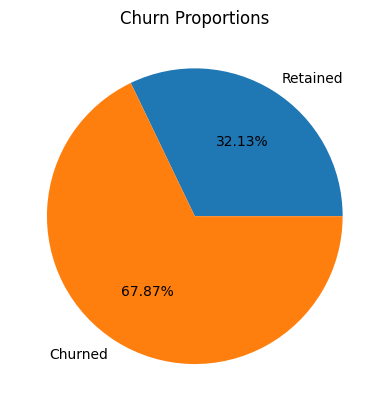

count  Percent
Churn                   
Retained    765    32.13
Churned    1616    67.87

In [ ]:
pie_args= {
    'labels':['Retained','Churned'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Churn Proportions',
            'show':None}

pieplot(df, plt_args, feature='Churn')

<font color='blue'>Observations:</font>
* High Churn Rate: The chart reveals a concerningly high churn rate of 67.87%.
* Low Retention Rate: Only 32.13% of customers are retained.
* Potential Revenue Impact: This high churn rate could significantly impact revenue and customer lifetime value.

---
###<font color="3a86a2"><span><b>Gender and their proportions</b></span></font>

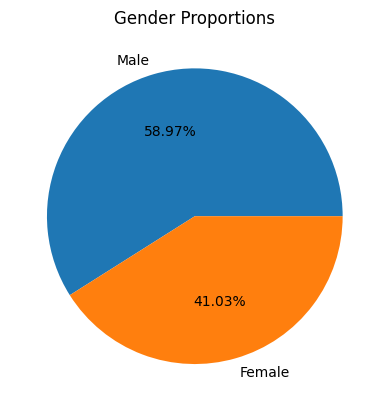

count  Percent
Gender                
Male     1404    58.97
Female    977    41.03

In [ ]:
pie_args= {
    'labels':['Male','Female'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Gender Proportions',
            'show':None}

pieplot(df, plt_args, feature='Gender')

<font color='blue'>Observations:</font>
* The chart indicates a significant male dominance, with males accounting for 58.97% of the total.

* Females constitute 41.03% of the total.

---
###<font color="3a86a2"><span><b>Education Levels and their  Proportions</b></span></font>

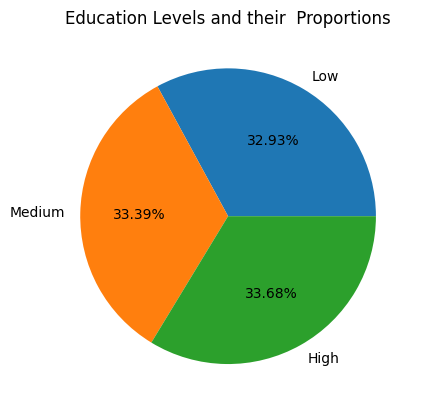

count  Percent
EducationLevel                
Low               784    32.93
Medium            795    33.39
High              802    33.68

In [ ]:
pie_args= {
    'labels':['Low', 'Medium', 'High'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Education Levels and their  Proportions',
            'show':None}

pieplot(df, plt_args, feature='EducationLevel')


<font color='blue'>Observations:</font>
* The chart shows a relatively even distribution of education levels among the population.
* Each education level (Low, Medium, and High) represents approximately one-third of the total.
* There is no single dominant education level.

---
###<font color="3a86a2"><span><b>Joining Designations and their Proportions</b></span></font>

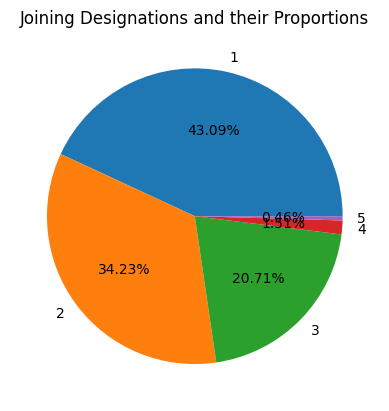

count  Percent
JoiningDesignation                
1                    1026    43.09
2                     815    34.23
3                     493    20.71
4                      36     1.51
5                      11     0.46

In [ ]:
pie_args= {'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Joining Designations and their Proportions',
            'show':None}

pieplot(df, plt_args, feature='JoiningDesignation')

<font color='blue'>Observations:</font>
* Joining Designation 1 is the most prominent, accounting for 43.09% of the total.
* The top three designations (1, 2, and 3) collectively represent over 97% of the total.
* Designations 4 and 5 are significantly less common, with only 1.51% and 0.46% respectively.

---
###<font color="3a86a2"><span><b>Grade Improvement status and their proportions</b></span></font>

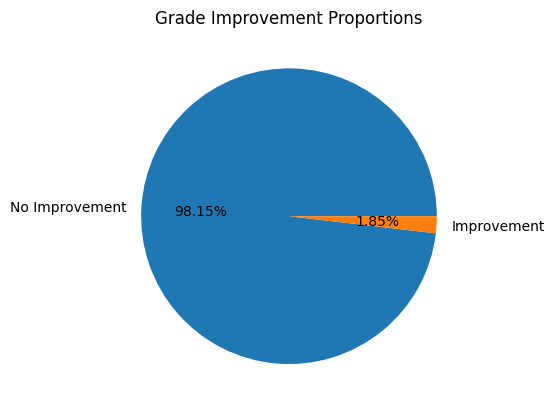

count  Percent
GradeImprovement                
No Improvement     2337    98.15
Improvement          44     1.85

In [ ]:
pie_args= {
    'labels':['No Improvement','Improvement'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Grade Improvement Proportions',
            'show':None}

pieplot(df, plt_args, feature='GradeImprovement')

<font color='blue'>Observations:</font>
* The pie chart reveals a significant lack of grade improvement, with a staggering 98.15% of individuals showing no improvement.
* Only 1.85% of individuals experienced grade improvement.

---
###<font color="3a86a2"><span><b>Avgerage Quartarly Rating Improvement status and their proportions</b></span></font>

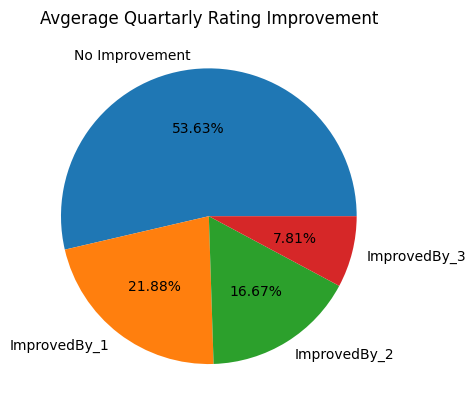

count  Percent
AvgQRatingImprovement                
No Improvement          1277    53.63
ImprovedBy_1             521    21.88
ImprovedBy_2             397    16.67
ImprovedBy_3             186     7.81

In [ ]:
pie_args= {
    'labels':['No Improvement','ImprovedBy_1','ImprovedBy_2','ImprovedBy_3'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Avgerage Quartarly Rating Improvement',
            'show':None}

pieplot(df, plt_args, feature='AvgQRatingImprovement')


<font color='blue'>Observations:</font>
* A significant portion (53.63%) of the ratings showed no improvement.
*  A smaller portion (21.88%) showed an improvement of one level.
* Improvements of two and three levels were observed in 16.67% and 7.81% of cases, respectively.

---
###<font color="3a86a2"><span><b>Salary increment status and their proportions</b></span></font>

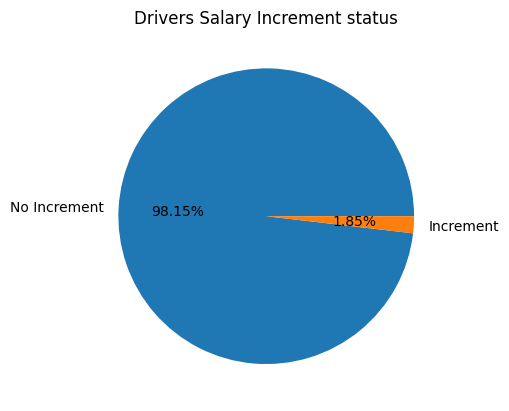

count  Percent
Increment                   
No Increment   2337    98.15
Increment        44     1.85

In [ ]:
pie_args= {
    'labels':['No Increment','Increment'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Drivers Salary Increment status',
            'show':None}

pieplot(df, plt_args, feature='Increment')


<font color='blue'>Observations:</font>
* The pie chart reveals a significant lack of salary increments for drivers, with a staggering 98.15% of drivers not receiving any increment.
* Only 1.85% of drivers received a salary increment.

___
##<font color="9e1d73"><span><b>Analysis using count plot</b></span></font>

---
###<font color="3a86a2"><span><b>Total months reported by drivers</b></span></font>

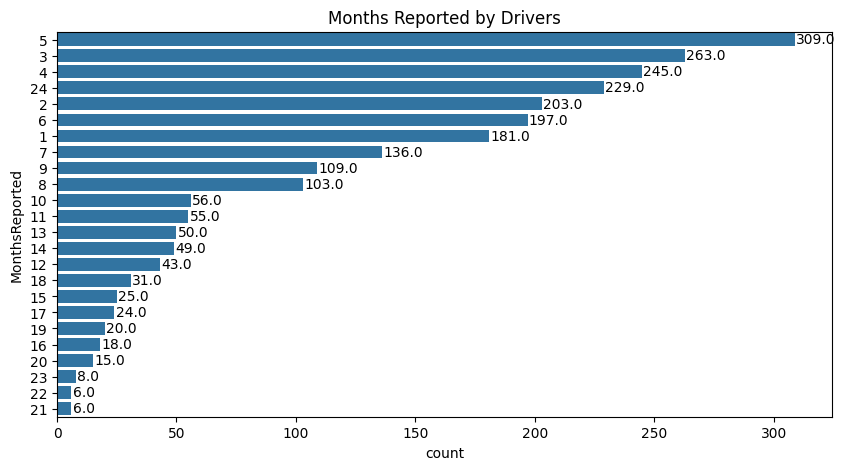

In [ ]:
title = 'Months Reported by Drivers'
countplot_with_annotations(df, 'MonthsReported', fs=(10, 5), plot_title=title, rotation=True)

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of months reported by drivers.
* Months 3, 4, and 5 are the top three months with the highest number of reports.
* As the month number increases, the number of reports generally decreases.

---
###<font color="3a86a2"><span><b>Drivers count w.r.t to last reported month</b></span></font>

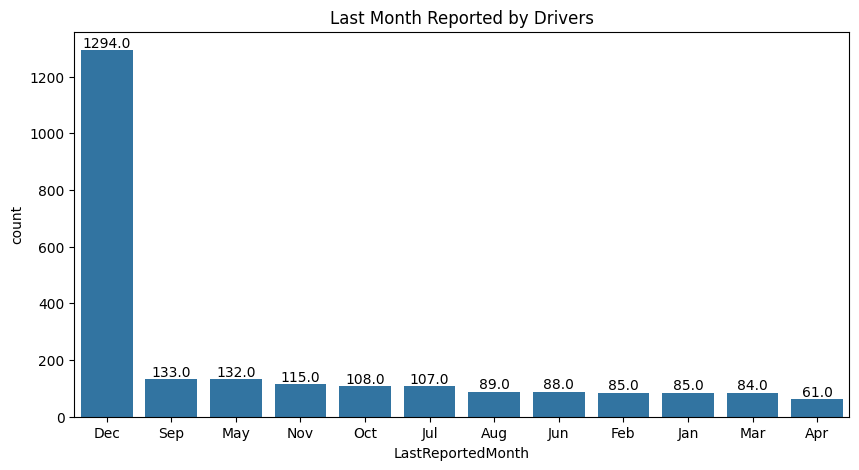

In [ ]:
title = 'Last Month Reported by Drivers'
countplot_with_annotations(df, feature='LastReportedMonth', fs=(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* December is the month with the highest number of reports, significantly outnumbering other months.
* There seems to be a seasonal pattern, with higher reporting rates in the later months of the year (October to December).
* After December, the number of reports drops significantly.

---
###<font color="3a86a2"><span><b>Drivers count w.r.t to last reported year</b></span></font>

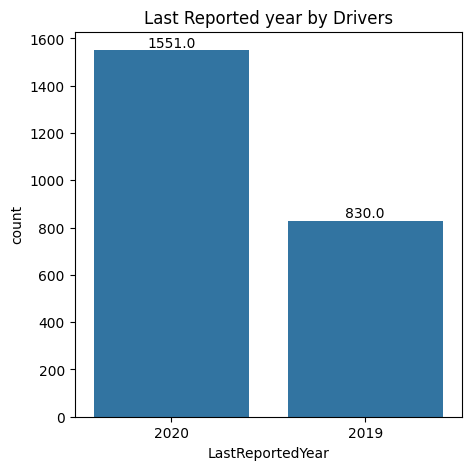

In [ ]:
title = 'Last Reported year by Drivers'
countplot_with_annotations(df, feature='LastReportedYear', fs=(5,5), plot_title=title)

<font color='blue'>Observations:</font>
* The year 2020 has the highest number of reports, significantly outnumbering 2019.
* There are no reports for the year 2021 or later.

---
###<font color="3a86a2"><span><b>Drivers count w.r.t to joining month</b></span></font>

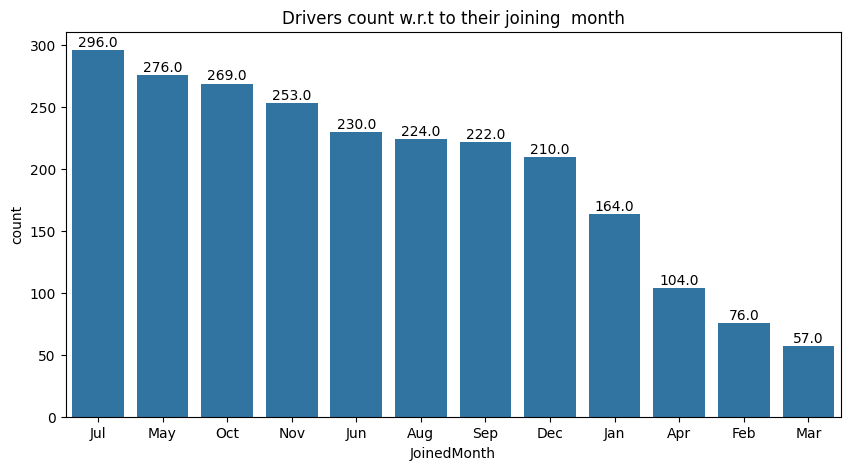

In [ ]:
title = 'Drivers count w.r.t to their joining  month'
countplot_with_annotations(df, feature='JoinedMonth', fs=(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* July and May are the months with the highest number of driver joins.
* There is a relatively consistent join rate throughout the year, with no significant drop-offs.
* February and March have the lowest number of driver joins.


---
###<font color="3a86a2"><span><b>Drivers count w.r.t to joining year</b></span></font>

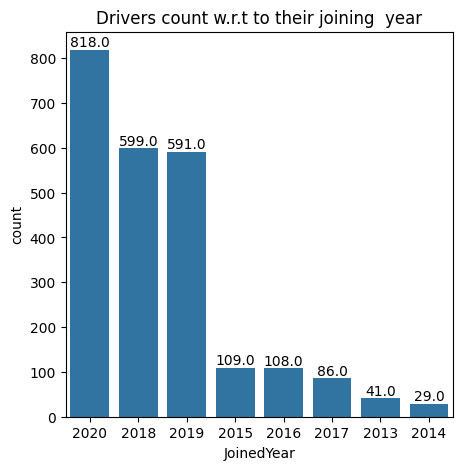

In [ ]:
title = 'Drivers count w.r.t to their joining  year'
countplot_with_annotations(df, feature='JoinedYear', fs=(5,5), plot_title=title)

<font color='blue'>Observations:</font>
* 2020 is the year with the highest number of driver joins, significantly outnumbering other years.
* There is a general trend of decreasing driver joins from 2020 onwards.
* 2013 and 2014 have the lowest number of driver joins.


---
###<font color="3a86a2"><span><b>Drivers count w.r.t to city</b></span></font>

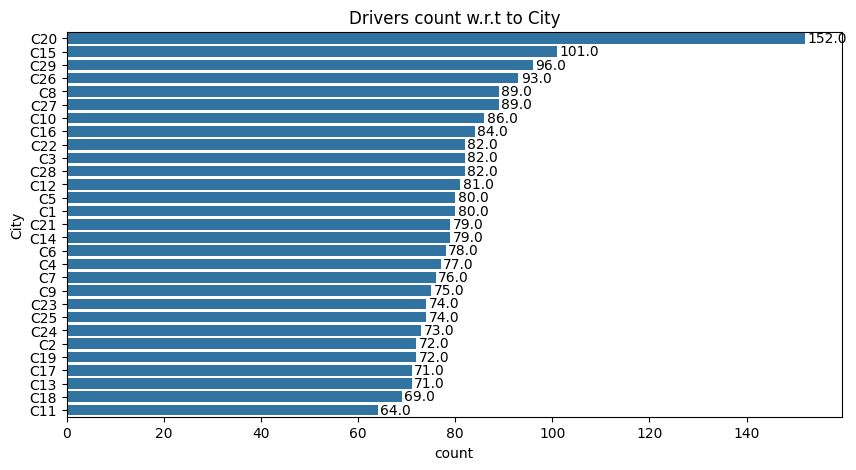

In [ ]:
title = 'Drivers count w.r.t to City'
countplot_with_annotations(df, feature='City', fs=(10,5), plot_title=title, rotation=True)

<font color='blue'>Observations:</font>
* The number of drivers varies significantly across different cities.
* Cities C11 and C20 have the highest number of drivers.
* There is a long tail of cities with relatively fewer drivers.


---
###<font color="3a86a2"><span><b>Drivers age distribution</b></span></font>

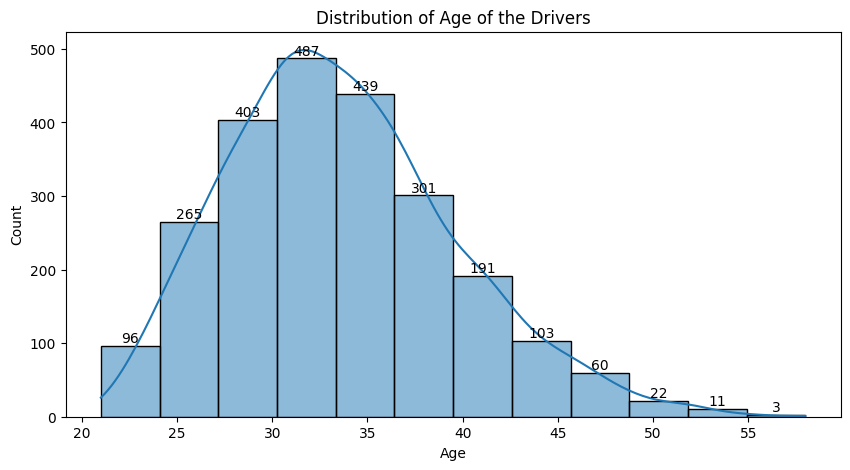

In [ ]:
title = 'Distribution of Age of the Drivers'
hist_with_annotation(df, 'Age', binwidth=3, fs =(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* The majority of drivers are between 25 and 35 years old.
* The distribution is right-skewed, indicating a larger proportion of younger drivers.
* The number of drivers decreases significantly after the age of 35.

---
###<font color="3a86a2"><span><b>Drivers average income distribution</b></span></font>

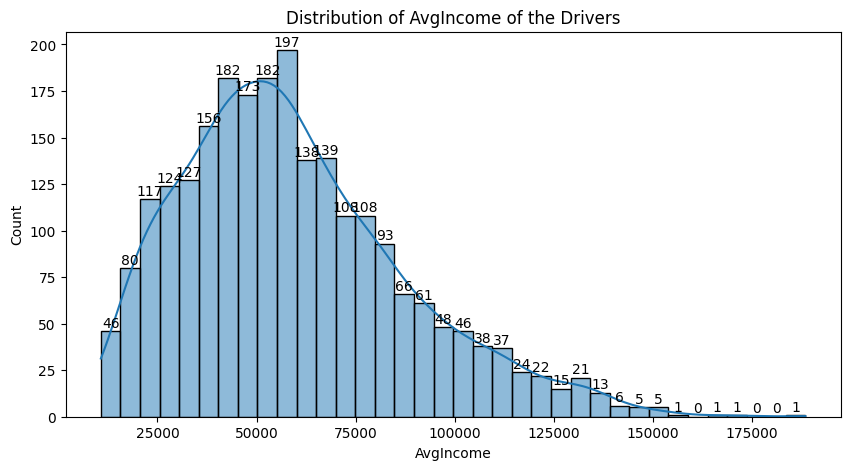

In [ ]:
title = 'Distribution of AvgIncome of the Drivers'
hist_with_annotation(df, 'AvgIncome', binwidth=5000, fs =(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* The distribution is right-skewed, indicating a larger proportion of drivers with lower average incomes.
* The majority of drivers have an average income between 25,000 and 75,000.
* A smaller proportion of drivers have higher average incomes, forming a long tail in the distribution.

---
###<font color="3a86a2"><span><b>Drivers average grade distribution</b></span></font>

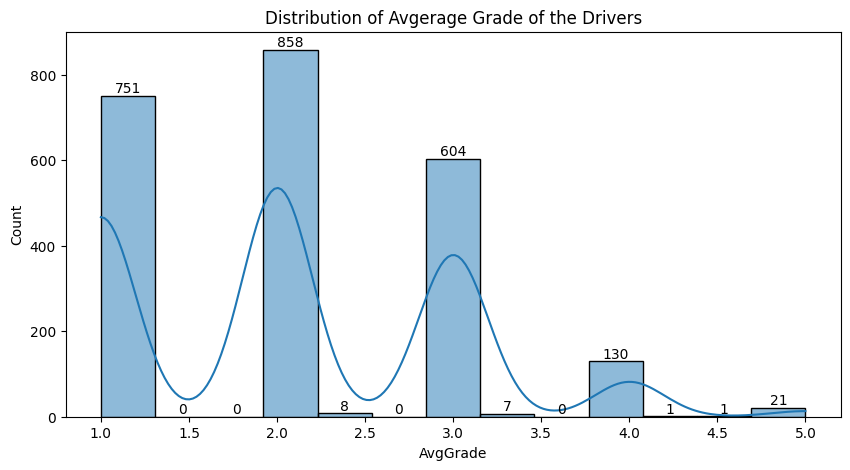

In [ ]:
title = 'Distribution of Avgerage Grade of the Drivers'
hist_with_annotation(df, 'AvgGrade', binwidth=0.3, fs =(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* The distribution appears to be bimodal, with two distinct peaks around a grade of 1.5 and 3.0. This suggests that there are two main groups of drivers with different performance levels.
* There is a significant cluster of drivers with an average grade around 2.0.
* A smaller group of drivers has a lower average grade, below 1.5.

---
###<font color="3a86a2"><span><b>Drivers average business value distribution</b></span></font>

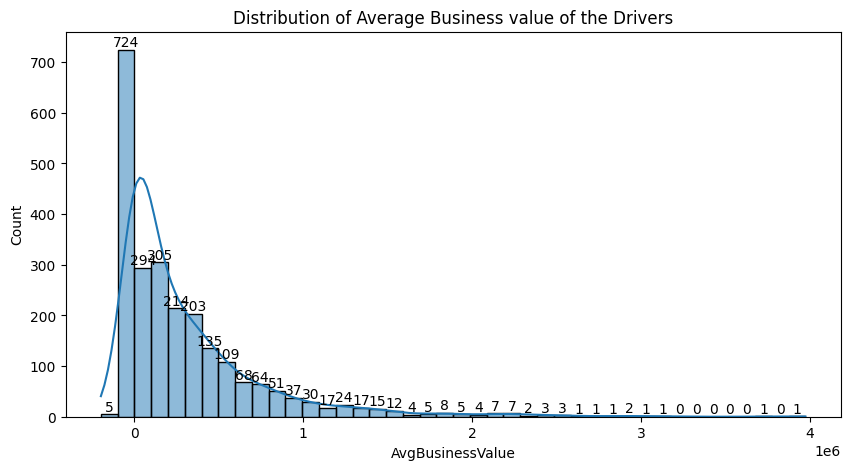

In [ ]:
title = 'Distribution of Average Business value of the Drivers'
hist_with_annotation(df, 'AvgBusinessValue', binwidth=100000, fs =(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* The distribution is heavily right-skewed, indicating a large number of drivers with lower average business values and a smaller number of high-performing drivers.
* The distribution has a long tail, suggesting that a few drivers generate a significant portion of the overall business value.
* The majority of drivers are clustered around lower average business values.

---
###<font color="3a86a2"><span><b>Drivers average quartarly rating distribution</b></span></font>

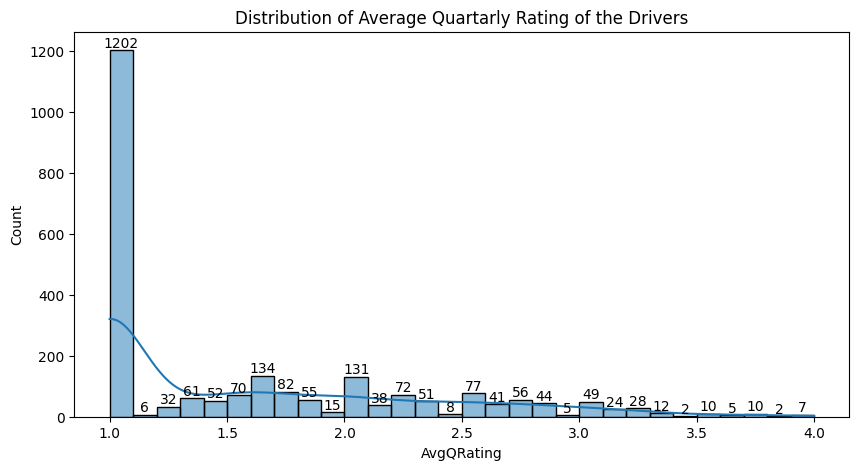

In [ ]:
title = 'Distribution of Average Quartarly Rating of the Drivers'
hist_with_annotation(df, 'AvgQRating', binwidth=0.1, fs =(10,5), plot_title=title)

<font color='blue'>Observations:</font>
* The distribution is heavily right-skewed, indicating a large number of drivers with lower average quarterly ratings and a smaller number of high-performing drivers.
* The majority of drivers are clustered around lower average quarterly ratings, suggesting that there is room for improvement in overall driver performance.
* The distribution has a long tail, indicating a few drivers with exceptionally high average quarterly ratings.

#<font color="#b7cd26"><span><b>Bivariate Analyis</b></span></font>





___
##<font color="9e1d73"><span><b>Churn status Analysis using bar plot</b></span></font>

---
###<font color="3a86a2"><span><b>Gender and their churn status</b></span></font>

Gender Churn  count
0      0     1    948
1      1     1    668
2      0     0    456
3      1     0    309

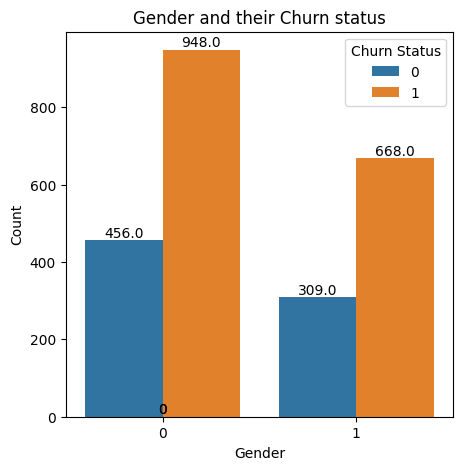

In [ ]:

df_gender_churn = df[['Gender','Churn']]
df_gender_churn_count = df_gender_churn.value_counts().reset_index()
display(df_gender_churn_count)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Gender', y='count', hue='Churn', data=df_gender_churn_count)
plt.title('Gender and their Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different genders.
* Gender 0 has a higher churn rate compared to Gender 1.
* Gender 1 has a lower churn rate compared to Gender 0.

---
###<font color="3a86a2"><span><b>Increment and their churn status</b></span></font>

Increment Churn  count
0         0     1   1613
1         0     0    724
2         1     0     41
3         1     1      3

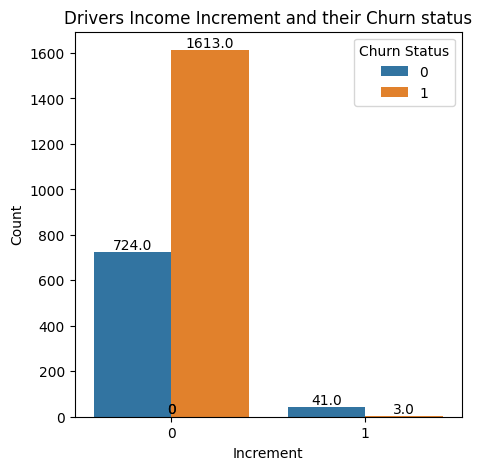

In [ ]:
df_increment_churn = df[['Increment','Churn']]
df_increment_churn_count = df_increment_churn.value_counts().reset_index()
display(df_increment_churn_count)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Increment', y='count', hue='Churn', data=df_increment_churn_count)
plt.title('Drivers Income Increment and their Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Increment')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* Drivers who did not receive an increment have a significantly higher churn rate.
* Drivers who received an increment have a much lower churn rate.

---
###<font color="3a86a2"><span><b>Total months reported and their churn status</b></span></font>

MonthsReported Churn  count
0                5     1    238
1               24     0    220
2                3     1    202
3                4     1    197
4                6     1    155
5                2     1    151
6                7     1    105
7                1     1    102
8                9     1     93
9                1     0     79
10               8     1     76
11               5     0     71
12               3     0     61
13               2     0     52
14              10     1     50
15               4     0     48
16              11     1     43
17               6     0     42
18              12     1     33
19              13     1     32
20               7     0     31
21              14     1     29
22               8     0     27
23              14     0     20
24              17     1     18
25              13     0     18
26              18     0     17
27               9     0     16
28              20     1     15
29              18     1     14
30              15     1     14
31              19     1     12
32              11     0     12
33              15     0     11
34              16     1     10
35              12     0     10
36              24     1      9
37              16     0      8
38              19     0      8
39              23     1      7
40              22     1      6
41              10     0      6
42              17     0      6
43              21     1      5
44              23     0      1
45              21     0      1

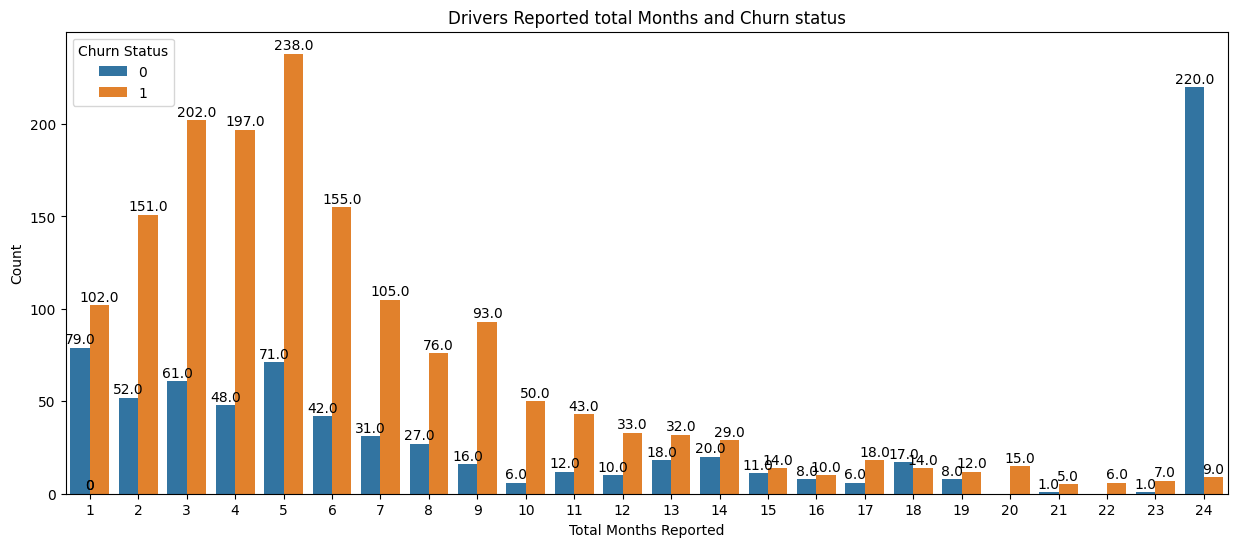

In [ ]:
df_mr_churn = df[['MonthsReported','Churn']]
df_mr_churn_count = df_mr_churn.value_counts().reset_index()
display(df_mr_churn_count)
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='MonthsReported', y='count', hue='Churn', data=df_mr_churn_count)
plt.title('Drivers Reported total Months and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Total Months Reported')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different total months reported.
* Drivers who reported fewer months tend to have higher churn rates.
* Drivers who reported more months tend to have lower churn rates.

---
###<font color="3a86a2"><span><b>Last month reported and churn status</b></span></font>

LastReportedMonth Churn  count
0                Dec     0    757
1                Dec     1    537
2                Sep     1    132
3                May     1    128
4                Nov     1    115
5                Oct     1    108
6                Jul     1    107
7                Aug     1     89
8                Jun     1     88
9                Jan     1     85
10               Mar     1     84
11               Feb     1     82
12               Apr     1     61
13               May     0      4
14               Feb     0      3
15               Sep     0      1

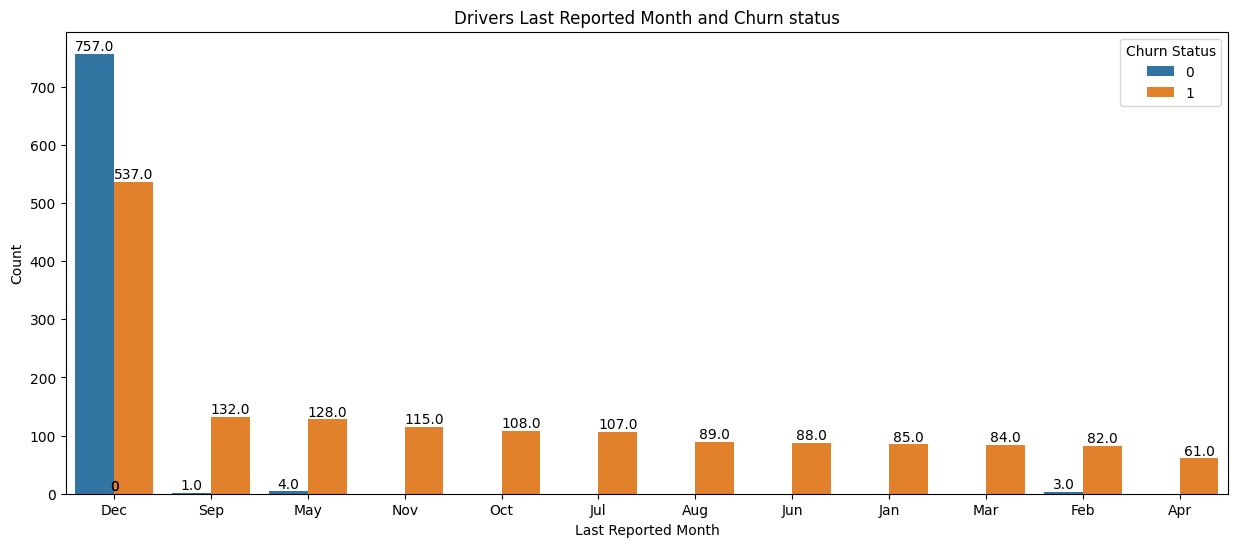

In [ ]:
df_lrn_churn = df[['LastReportedMonth','Churn']]
df_lrn_churn_count = df_lrn_churn.value_counts().reset_index()
display(df_lrn_churn_count)
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='LastReportedMonth', y='count', hue='Churn', data=df_lrn_churn_count)
plt.title('Drivers Last Reported Month and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Last Reported Month')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different last reported months.
* December has the highest churn rate compared to other months.
* Months like April, February, and March have lower churn rates.

---
###<font color="3a86a2"><span><b>Last reported year and churn status</b></span></font>

LastReportedYear Churn  count
0              2019     1    825
1              2020     1    791
2              2020     0    760
3              2019     0      5

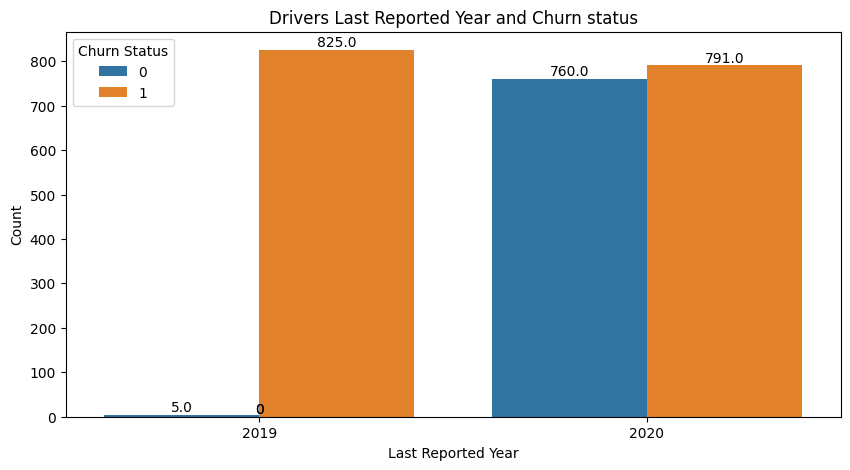

In [ ]:
df_lry_churn = df[['LastReportedYear','Churn']]
df_lry_churn_count = df_lry_churn.value_counts().reset_index()
display(df_lry_churn_count)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='LastReportedYear', y='count', hue='Churn', data=df_lry_churn_count)
plt.title('Drivers Last Reported Year and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Last Reported Year')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different last reported years.
* The year 2019 has a higher churn rate compared to 2020.
* The year 2020 has a lower churn rate compared to 2019.

---
###<font color="3a86a2"><span><b>Joined month and churn status</b></span></font>

JoinedMonth Churn  count
0          May     1    207
1          Jul     1    192
2          Oct     1    182
3          Jun     1    173
4          Nov     1    153
5          Aug     1    148
6          Jan     1    132
7          Sep     1    131
8          Dec     1    122
9          Jul     0    104
10         Nov     0    100
11         Sep     0     91
12         Dec     0     88
13         Oct     0     87
14         Aug     0     76
15         Apr     1     70
16         May     0     69
17         Feb     1     58
18         Jun     0     57
19         Mar     1     48
20         Apr     0     34
21         Jan     0     32
22         Feb     0     18
23         Mar     0      9

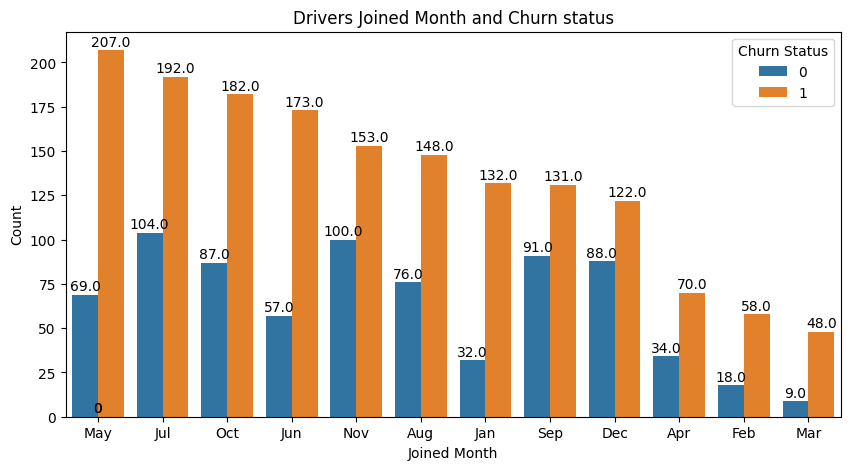

In [ ]:
df_jm_churn = df[['JoinedMonth','Churn']]
df_jm_churn_count = df_jm_churn.value_counts().reset_index()
display(df_jm_churn_count)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='JoinedMonth', y='count', hue='Churn', data=df_jm_churn_count)
plt.title('Drivers Joined Month and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Joined Month')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different joining months.
* Months like May, July, and October have higher churn rates compared to other months.
*  Months like February, March, and April have lower churn rates.

---
###<font color="3a86a2"><span><b>Joined year and churn status</b></span></font>

JoinedYear Churn  count
0         2018     1    529
1         2019     1    489
2         2020     0    440
3         2020     1    378
4         2019     0    102
5         2018     0     70
6         2016     1     67
7         2017     1     66
8         2015     0     55
9         2015     1     54
10        2016     0     41
11        2013     1     25
12        2014     0     21
13        2017     0     20
14        2013     0     16
15        2014     1      8

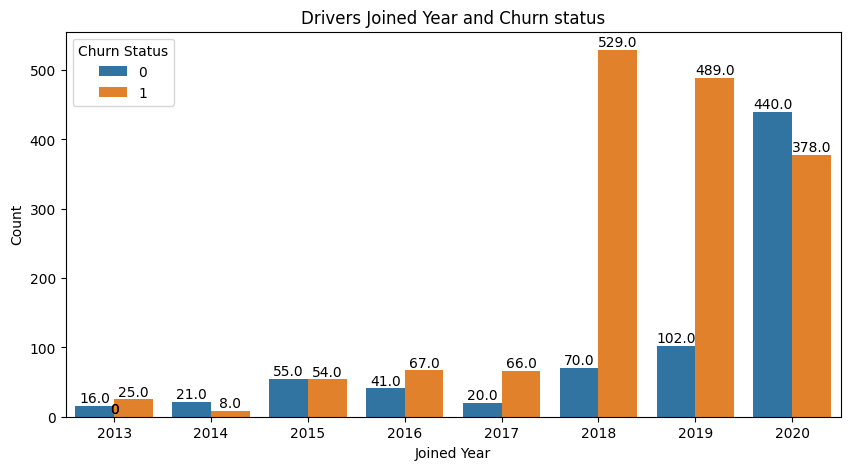

In [ ]:
df_jy_churn = df[['JoinedYear','Churn']]
df_jy_churn_count = df_jy_churn.value_counts().reset_index()
display(df_jy_churn_count)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='JoinedYear', y='count', hue='Churn', data=df_jy_churn_count)
plt.title('Drivers Joined Year and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Joined Year')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different joining years.
* The years 2019 and 2020 have higher churn rates compared to earlier years.
* The years 2013 and 2014 have lower churn rates.

---
###<font color="3a86a2"><span><b>City and their churn status</b></span></font>

City Churn  count
0   C20     1    111
1   C15     1     69
2   C26     1     65
3   C10     1     61
4   C27     1     60
5   C28     1     59
6   C13     1     58
7   C14     1     58
8   C23     1     57
9    C1     1     56
10   C2     1     55
11   C6     1     55
12  C17     1     55
13  C25     1     54
14  C12     1     53
15   C8     1     53
16   C9     1     53
17   C3     1     52
18   C4     1     52
19   C7     1     52
20  C29     1     51
21  C24     1     51
22  C22     1     50
23  C16     1     50
24   C5     1     48
25  C21     1     48
26  C11     1     45
27  C29     0     45
28  C18     1     44
29  C20     0     41
30  C19     1     41
31   C8     0     36
32  C16     0     34
33  C22     0     32
34   C5     0     32
35  C15     0     32
36  C19     0     31
37  C21     0     31
38   C3     0     30
39  C27     0     29
40  C12     0     28
41  C26     0     28
42  C18     0     25
43  C10     0     25
44   C4     0     25
45   C7     0     24
46   C1     0     24
47   C6     0     23
48  C28     0     23
49  C24     0     22
50   C9     0     22
51  C14     0     21
52  C25     0     20
53  C11     0     19
54  C23     0     17
55   C2     0     17
56  C17     0     16
57  C13     0     13

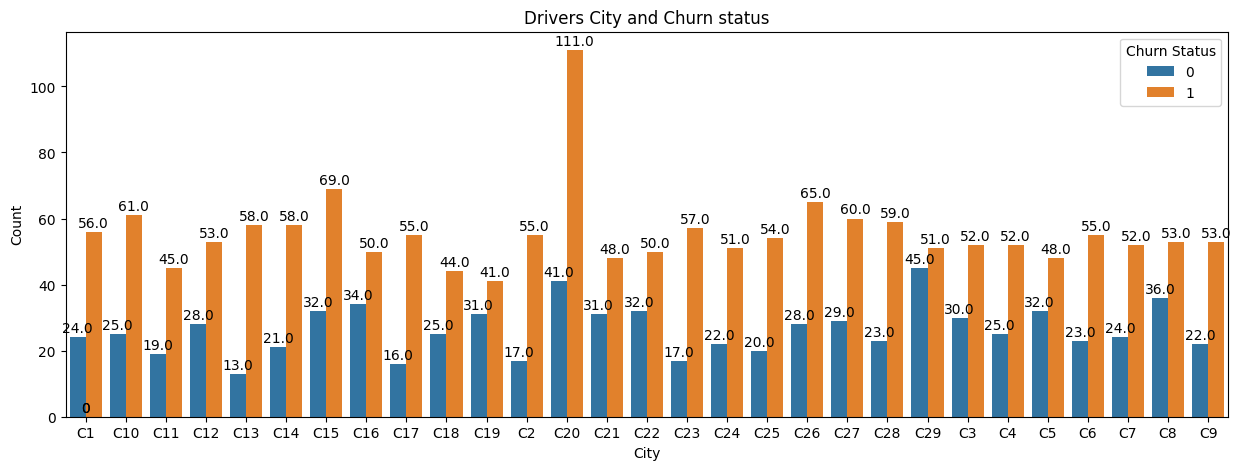

In [ ]:
df_city_churn = df[['City','Churn']]
df_city_churn_count = df_city_churn.value_counts().reset_index()
display(df_city_churn_count)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='City', y='count', hue='Churn', data=df_city_churn_count)
plt.title('Drivers City and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('City')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different cities.
* Certain cities have higher churn rates compared to others.
* Other cities have lower churn rates.

---
###<font color="3a86a2"><span><b>Grade Improvement status and their churn status</b></span></font>

GradeImprovement Churn  count
0                 0     1   1613
1                 0     0    724
2                 1     0     41
3                 1     1      3

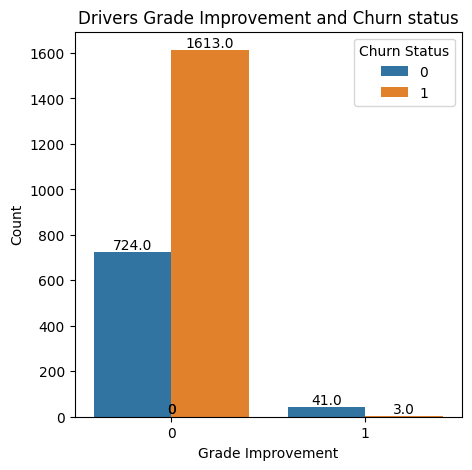

In [ ]:
df_gi_churn = df[['GradeImprovement','Churn']]
df_gi_churn_count = df_gi_churn.value_counts().reset_index()
display(df_gi_churn_count)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='GradeImprovement', y='count', hue='Churn', data=df_gi_churn_count)
plt.title('Drivers Grade Improvement and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Grade Improvement')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* Drivers who did not show any grade improvement have a significantly higher churn rate.
* Drivers who showed improvement in their grade have a much lower churn rate.

---
###<font color="3a86a2"><span><b>Joined Designation and churn status</b></span></font>

JoiningDesignation Churn  count
0                  1     1    752
1                  2     1    560
2                  1     0    274
3                  3     1    274
4                  2     0    255
5                  3     0    219
6                  4     1     22
7                  4     0     14
8                  5     1      8
9                  5     0      3

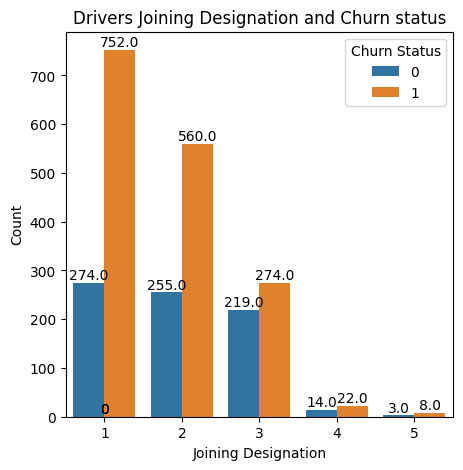

In [ ]:
df_jd_churn = df[['JoiningDesignation','Churn']]
df_jd_churn_count = df_jd_churn.value_counts().reset_index()
display(df_jd_churn_count)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='JoiningDesignation', y='count', hue='Churn', data=df_jd_churn_count)
plt.title('Drivers Joining Designation and Churn status')
plt.legend(title='Churn Status')
plt.xlabel('Joining Designation')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different joining designations.
* Lower designations (1, 2, 3) have higher churn rates compared to higher designations (4, 5).
* Higher designations (4, 5) have lower churn rates.

---
###<font color="3a86a2"><span><b>Education level and churn status</b></span></font>

EducationLevel Churn  count
0              2     1    547
1              0     1    542
2              1     1    527
3              1     0    268
4              2     0    255
5              0     0    242

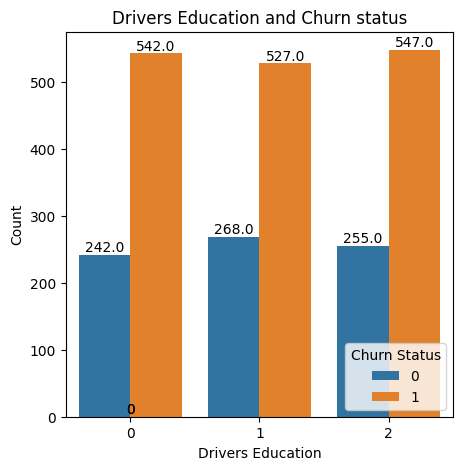

In [ ]:
df_education_churn = df[['EducationLevel','Churn']]
df_education_churn_count = df_education_churn.value_counts().reset_index()
display(df_education_churn_count)
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='EducationLevel', y='count', hue='Churn', data=df_education_churn_count)
plt.title('Drivers Education and Churn status')
plt.legend(title='Churn Status', loc='lower right')
plt.xlabel('Drivers Education')
plt.ylabel('Count')
annotate(ax)
plt.show()

<font color='blue'>Observations:</font>
* The data shows an uneven distribution of churn across different education levels.
* Drivers with lower education levels tend to have higher churn rates.
* Drivers with higher education levels tend to have lower churn rates.

___
##<font color="9e1d73"><span><b>Outliers Detetction using box plot</b></span></font>

---
###<font color="3a86a2"><span><b>Churn status w.r.t age</b></span></font>

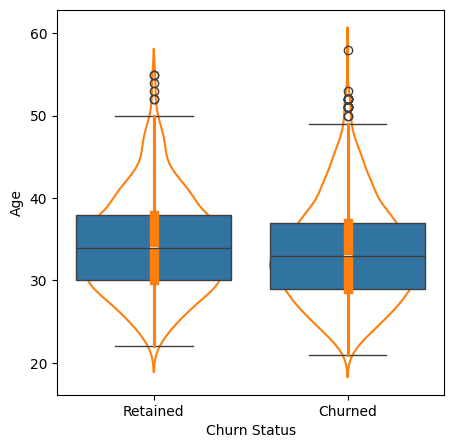

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='Age', x='Churn', data=df)
sns.violinplot(y='Age', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Both retained and churned drivers have a similar distribution of ages, with a median age around 35.
* There are some outliers, particularly in the older age groups, for both retained and churned drivers.
* There doesn't seem to be a significant difference in the distribution of ages between retained and churned drivers.

---
###<font color="3a86a2"><span><b>Churn status w.r.t avgerage income</b></span></font>

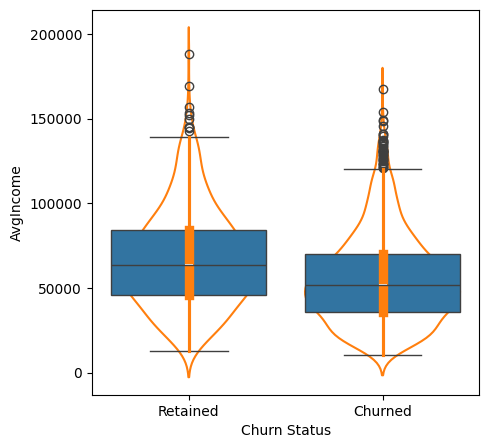

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='AvgIncome', x='Churn', data=df)
sns.violinplot(y='AvgIncome', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Retained drivers tend to have a higher average income compared to churned drivers.
* There are some outliers in both groups, indicating a few drivers with significantly higher or lower incomes.
* The distributions of average income for retained and churned drivers overlap to some extent, suggesting that income alone may not be a strong predictor of churn.

---
###<font color="3a86a2"><span><b>Churn status w.r.t average business value</b></span></font>

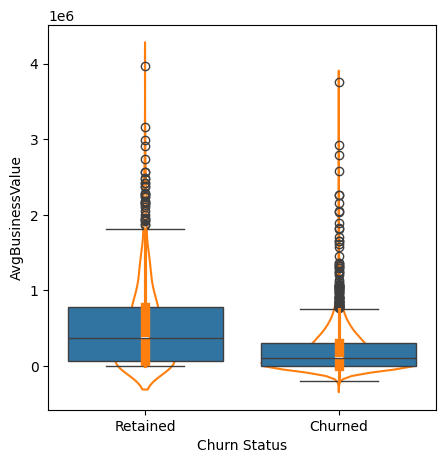

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='AvgBusinessValue', x='Churn', data=df)
sns.violinplot(y='AvgBusinessValue', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Retained drivers tend to have a higher average business value compared to churned drivers.
* There are some outliers in both groups, indicating a few drivers with significantly higher or lower business values.
* The distributions of average business value for retained and churned drivers overlap to some extent, suggesting that business value alone may not be a strong predictor of churn.

---
###<font color="3a86a2"><span><b>Churn status w.r.t average grade</b></span></font>

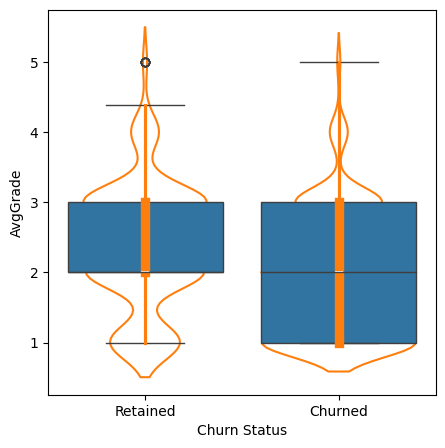

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='AvgGrade', x='Churn', data=df)
sns.violinplot(y='AvgGrade', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Both retained and churned drivers have a similar distribution of average grades, with a median grade around 3.
* There are some outliers in both groups, indicating a few drivers with significantly higher or lower grades.
* There doesn't seem to be a significant difference in the distribution of average grades between retained and churned drivers.

---
###<font color="3a86a2"><span><b>Churn status w.r.t average quarterly rating</b></span></font>

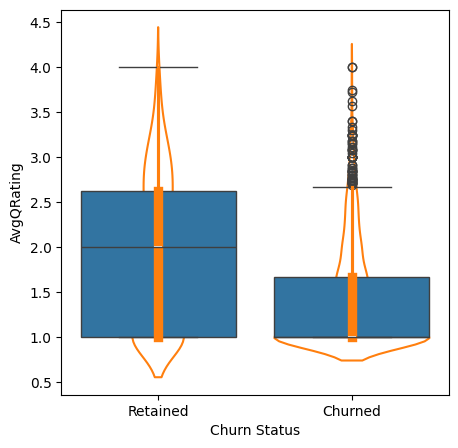

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='AvgQRating', x='Churn', data=df)
sns.violinplot(y='AvgQRating', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Retained drivers tend to have a higher average quarterly rating compared to churned drivers.
* There are some outliers in both groups, indicating a few drivers with significantly higher or lower ratings.
* The distributions of average quarterly ratings for retained and churned drivers overlap to some extent, suggesting that ratings alone may not be a strong predictor of churn.

---
###<font color="3a86a2"><span><b>Churn status w.r.t average quartarly improvement status</b></span></font>

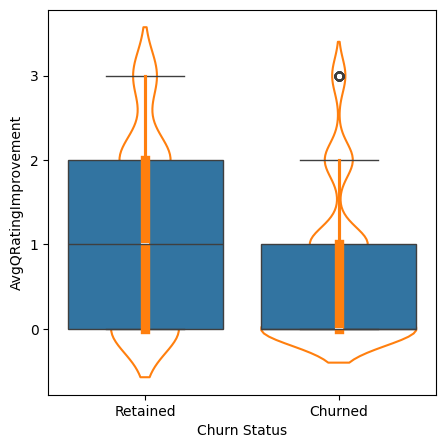

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(y='AvgQRatingImprovement', x='Churn', data=df)
sns.violinplot(y='AvgQRatingImprovement', x='Churn', data=df, fill=False)
plt.xticks([0,1],['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.show()

<font color='blue'>Observations:</font>
* Retained drivers tend to have a higher average rating improvement compared to churned drivers.
* There are some outliers in both groups, indicating a few drivers with significantly higher or lower rating improvements.
* The distributions of average rating improvement for retained and churned drivers overlap to some extent, suggesting that rating improvement alone may not be a strong predictor of churn.

#<font color="#b7cd26"><span><b>Multivariate Analyis</b></span></font>

___
##<font color="9e1d73"><span><b>Correlation check using pairplot</b></span></font>

<Figure size 3000x3000 with 0 Axes>

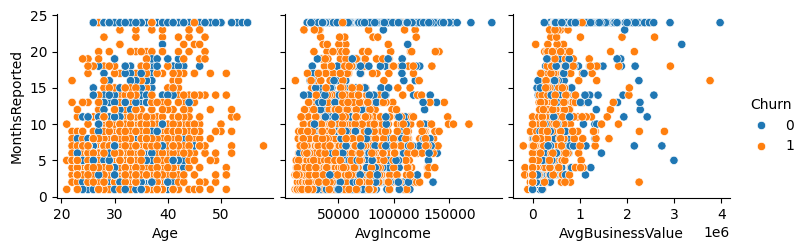

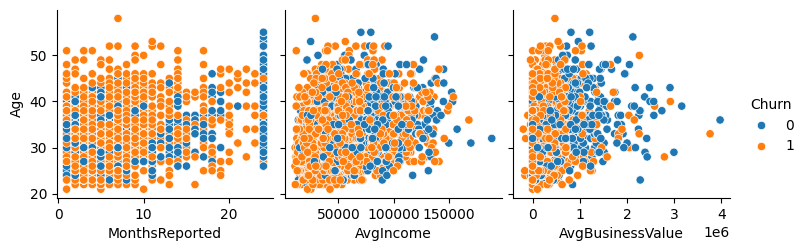

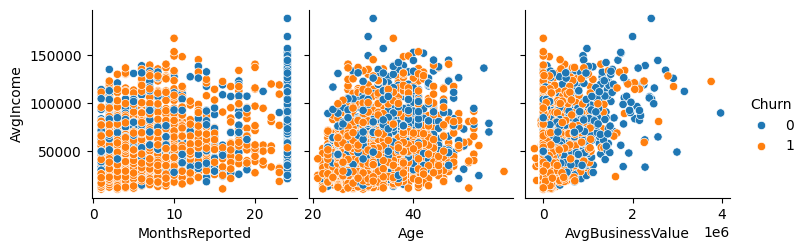

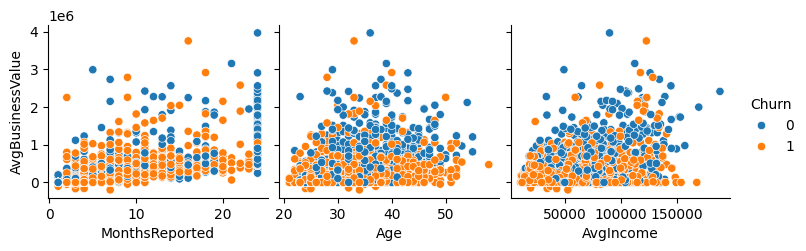

In [ ]:
plt.figure(figsize=(30,30))

num_date_columns = ['MonthsReported', 'Age', 'AvgIncome', 'AvgBusinessValue']

for i in range(0,len(num_date_columns)):
  if np.isin(num_date_columns[i], num_date_columns):
    yvar = num_date_columns[i]
    xvars = [j for j in num_date_columns if num_date_columns[i] != j]
    sns.pairplot(y_vars=yvar, x_vars=xvars, data=df, hue='Churn')
plt.show()


<font color='blue'>From the scatter plots, we can observe the following:</font>
* **Months Reported vs. Age:**

    * There seems to be a slight positive correlation between the number of months reported and age. Older drivers tend to have been with the company for longer.
    * However, there's a wide range of months reported for each age group, suggesting that age alone is not a strong predictor of tenure.

* **AvgIncome vs. Age:**

    * No clear relationship is visible between age and average income. Drivers of all ages have a wide range of income levels.
AvgBusinessValue vs. Age:

* **AvgBusinessValue vs. Age:**
  * There's no strong correlation between age and average business value. Drivers of all ages can have high or low business values.

* **Months Reported vs. AvgIncome:**

  * There's a weak positive correlation between months reported and average income. Drivers who have been with the company longer tend to have slightly higher incomes.

* **Age vs. AvgBusinessValue:**

  * No clear relationship is visible between age and average business value. Drivers of all ages can have high or low business values.

* **Months Reported vs. AvgBusinessValue:**

  * There's a weak positive correlation between months reported and average business value. Drivers who have been with the company longer tend to have slightly higher business values.

* **AvgIncome vs. AvgBusinessValue:**

  * There's a strong positive correlation between average income and average business value. Drivers with higher incomes tend to have higher business values.

___
##<font color="9e1d73"><span><b>Correlation check using heatmap</b></span></font>

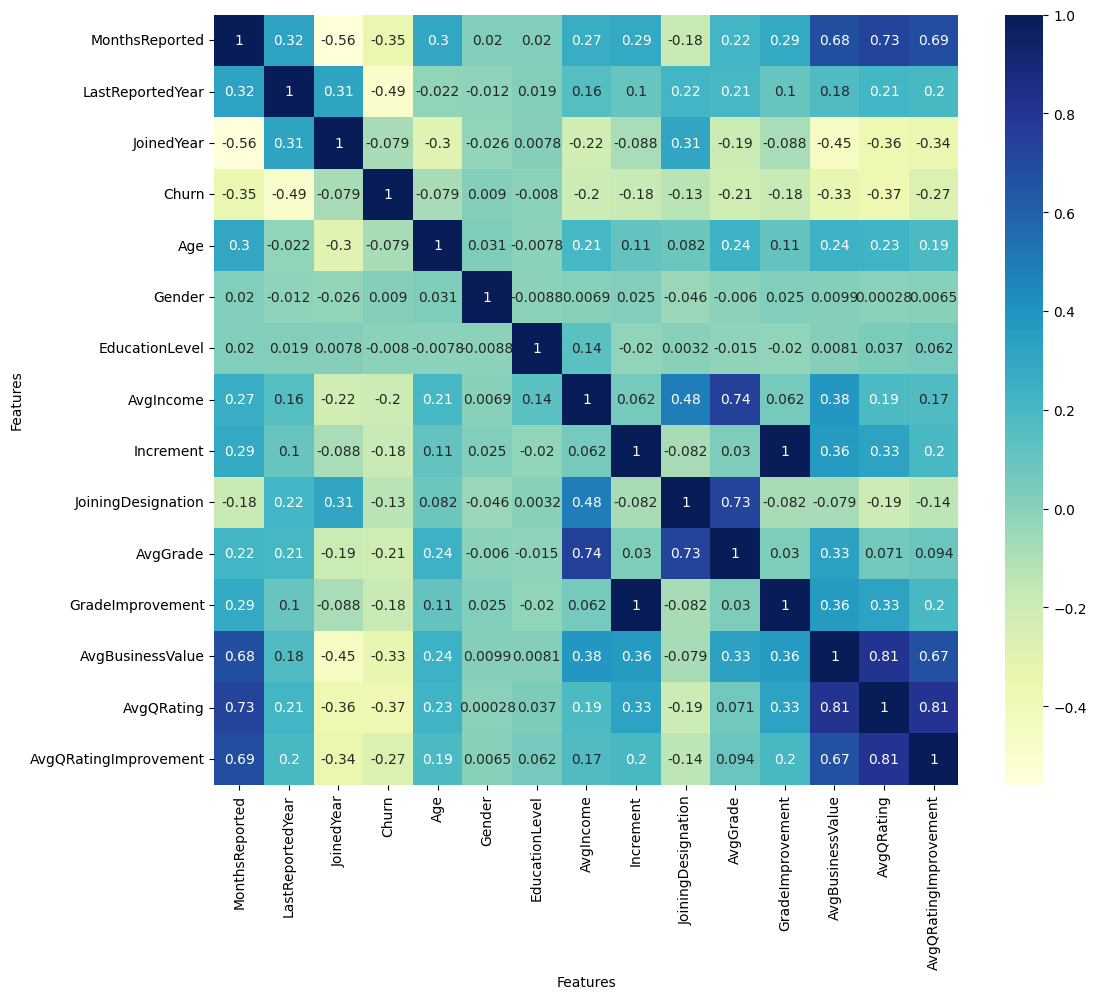

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df[['MonthsReported', 'LastReportedYear', 'JoinedYear', 'Churn', 'Age', 'Gender', 'EducationLevel', 'AvgIncome', 'Increment','JoiningDesignation','AvgGrade', 'GradeImprovement', 'AvgBusinessValue', 'AvgQRating', 'AvgQRatingImprovement']].corr(), annot=True, cmap='YlGnBu')
plt.show()

<font color='blue'>Insights from the Correlation Matrix:</font>

* **Strong Positive Correlations:**
  * AvgBusinessValue and AvgIncome have a strong positive correlation, indicating that drivers with higher average incomes tend to have higher average business values.

  * AvgQRatingImprovement and AvgRatingImprovement have a strong positive correlation, suggesting that drivers who improve their ratings over time tend to have higher average quarterly ratings.

* **Moderate Positive Correlations:**
  * AvgQRating and AvgRatingImprovement have a moderate positive correlation, indicating that drivers with higher average quarterly ratings tend to have higher rating improvements.
  * AvgBusinessValue and AvgQRating have a moderate positive correlation, suggesting that drivers with higher average business values tend to have higher average quarterly ratings.

* **Moderate Negative Correlations:**

  *JoinedYear and Churn have a moderate negative correlation, indicating that drivers who joined more recently are more likely to churn.

  * MonthsReported and Churn have a moderate negative correlation, suggesting that drivers who have been active for longer are less likely to churn.


* **Based on these correlations, we can identify potential factors that could contribute to driver churn:**
  * Drivers with lower average business values are more likely to churn.
  * Drivers with lower average quarterly ratings are more likely to churn.
  * Drivers who have joined recently are more likely to churn.
  * Drivers who have reported fewer months are more likely to churn

#<font color="#b7cd26"><span><b>Data Pre-Processing</b></span></font>

##<font color="#9e1d73"><span><b>Removing Highly Correlated Features</b></span>
*   Drop the features which are redundant.

In [ ]:
high_correlated_features = ['GradeImprovement', 'AvgQRating']
df.drop(columns=high_correlated_features, inplace=True)
print(Style.BRIGHT+Back.RED+Fore.WHITE+'Following Features are very highly correlated with other features, Hence dropped.\n')
for i in high_correlated_features:
  print(Back.WHITE+Fore.BLUE+i, '\n')
display(df.head())

Following Features are very highly correlated with other features, Hence dropped.

GradeImprovement 

AvgQRating 



Features   MonthsReported LastReportedMonth  LastReportedYear JoinedMonth  \
Driver_ID                                                                   
1                       3               Mar              2019         Dec   
2                       2               Dec              2020         Nov   
4                       5               Dec              2020         Dec   
5                       3               Mar              2019         Jan   
6                       5               Dec              2020         Jul   

Features   JoinedYear Churn  Age Gender City EducationLevel  AvgIncome  \
Driver_ID                                                                
1                2018     1   28      0  C23              2    57387.0   
2                2020     0   31      0   C7              2    67016.0   
4                2019     1   43      0  C13              2    65603.0   
5                2019     1   29      0   C9              0    46368.0   
6                2020     0   31      1  C11              1    78728.0   

Features  Increment JoiningDesignation  AvgGrade  AvgBusinessValue  \
Driver_ID                                                            
1                 0                  1       1.0          571860.0   
2                 0                  2       2.0               0.0   
4                 0                  2       2.0           70000.0   
5                 0                  1       1.0           40120.0   
6                 0                  3       3.0          253000.0   

Features   AvgQRatingImprovement  
Driver_ID                         
1                            0.0  
2                            0.0  
4                            0.0  
5                            0.0  
6                            1.0

##<font color="#9e1d73"><span><b>Null Values Treatment</b></span>
*   Drop Rows/Columns
*   Impute Values

<font color='blue'>Observation:</font> From above Basic analysis on the data, it's clear that there are no Null values.

##<font color="#9e1d73"><span><b>Duplicates Data Handling</b></span>
*   Find Duplicate Records
*   Remove Duplicates  

<font color='blue'>Observation:</font> From above Basic analysis on the data, No duplicate records found.

##<font color="#9e1d73"><span><b>Transforming Features</b></span>
*  Log/Exponential Transform
*  Polynomial Features
*  Binning

> Columns <font color='magenta'>'AvgBusinessValue'</font> has more extreme values, These features can be handled using log-normal transformation technique.






In [ ]:
more_extreme_values_features = ['AvgBusinessValue']
for i in more_extreme_values_features:
  df.loc[:,i] = np.log1p(df.loc[:,i].clip(lower=0))

##<font color="#9e1d73"><span><b>Outliers Treatment</b></span>
*   Detect Outliers
*   Handle Outliers

>From the above uni-variate and bi-variate analysis we can observe that all the numerical features has soo many outliers.



In [ ]:
def treat_outliers(dataframe, feature, target, classes):
    for i in classes:
        # Filter the DataFrame for the current class
        class_filter = dataframe[target] == i
        class_values = dataframe.loc[class_filter, feature]

        # Calculate IQR and bounds
        Q1 = class_values.quantile(0.25)
        Q3 = class_values.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply clipping to handle outliers
        dataframe.loc[class_filter, feature] = class_values.clip(lower=lower_bound, upper=upper_bound)

    return dataframe

otliers_treated_numeric_features = []

features = ['Age', 'AvgIncome', 'AvgBusinessValue', 'AvgGrade', 'AvgQRatingImprovement']
target = 'Churn'
classes = [0,1]

for i in features:
  df = treat_outliers(df, i, target, classes)
  otliers_treated_numeric_features.append(i)

##<font color="#9e1d73"><span><b>Inconsistent Data Handling</b></span>


*   Standardize Categorical Variables (e.g., "male" and "Male" should be standardized to one format).
*   Handle Typos and Inconsistencies (e.g., "NY" vs. "New York").


##<font color="#9e1d73"><span><b>Final Sanity Checks</b></span>
*   Recheck Missing Values
*   Visualize Distributions
*   Check for Data Leakage



In [ ]:
df.head()

Features   MonthsReported LastReportedMonth  LastReportedYear JoinedMonth  \
Driver_ID                                                                   
1                       3               Mar              2019         Dec   
2                       2               Dec              2020         Nov   
4                       5               Dec              2020         Dec   
5                       3               Mar              2019         Jan   
6                       5               Dec              2020         Jul   

Features   JoinedYear Churn  Age Gender City EducationLevel  AvgIncome  \
Driver_ID                                                                
1                2018     1   28      0  C23              2    57387.0   
2                2020     0   31      0   C7              2    67016.0   
4                2019     1   43      0  C13              2    65603.0   
5                2019     1   29      0   C9              0    46368.0   
6                2020     0   31      1  C11              1    78728.0   

Features  Increment JoiningDesignation  AvgGrade  AvgBusinessValue  \
Driver_ID                                                            
1                 0                  1       1.0         13.256651   
2                 0                  2       2.0          7.396193   
4                 0                  2       2.0         11.156265   
5                 0                  1       1.0         10.599655   
6                 0                  3       3.0         12.441149   

Features   AvgQRatingImprovement  
Driver_ID                         
1                            0.0  
2                            0.0  
4                            0.0  
5                            0.0  
6                            1.0

In [ ]:
df.isna().sum()

Features
MonthsReported           0
LastReportedMonth        0
LastReportedYear         0
JoinedMonth              0
JoinedYear               0
Churn                    0
Age                      0
Gender                   0
City                     0
EducationLevel           0
AvgIncome                0
Increment                0
JoiningDesignation       0
AvgGrade                 0
AvgBusinessValue         0
AvgQRatingImprovement    0
dtype: int64

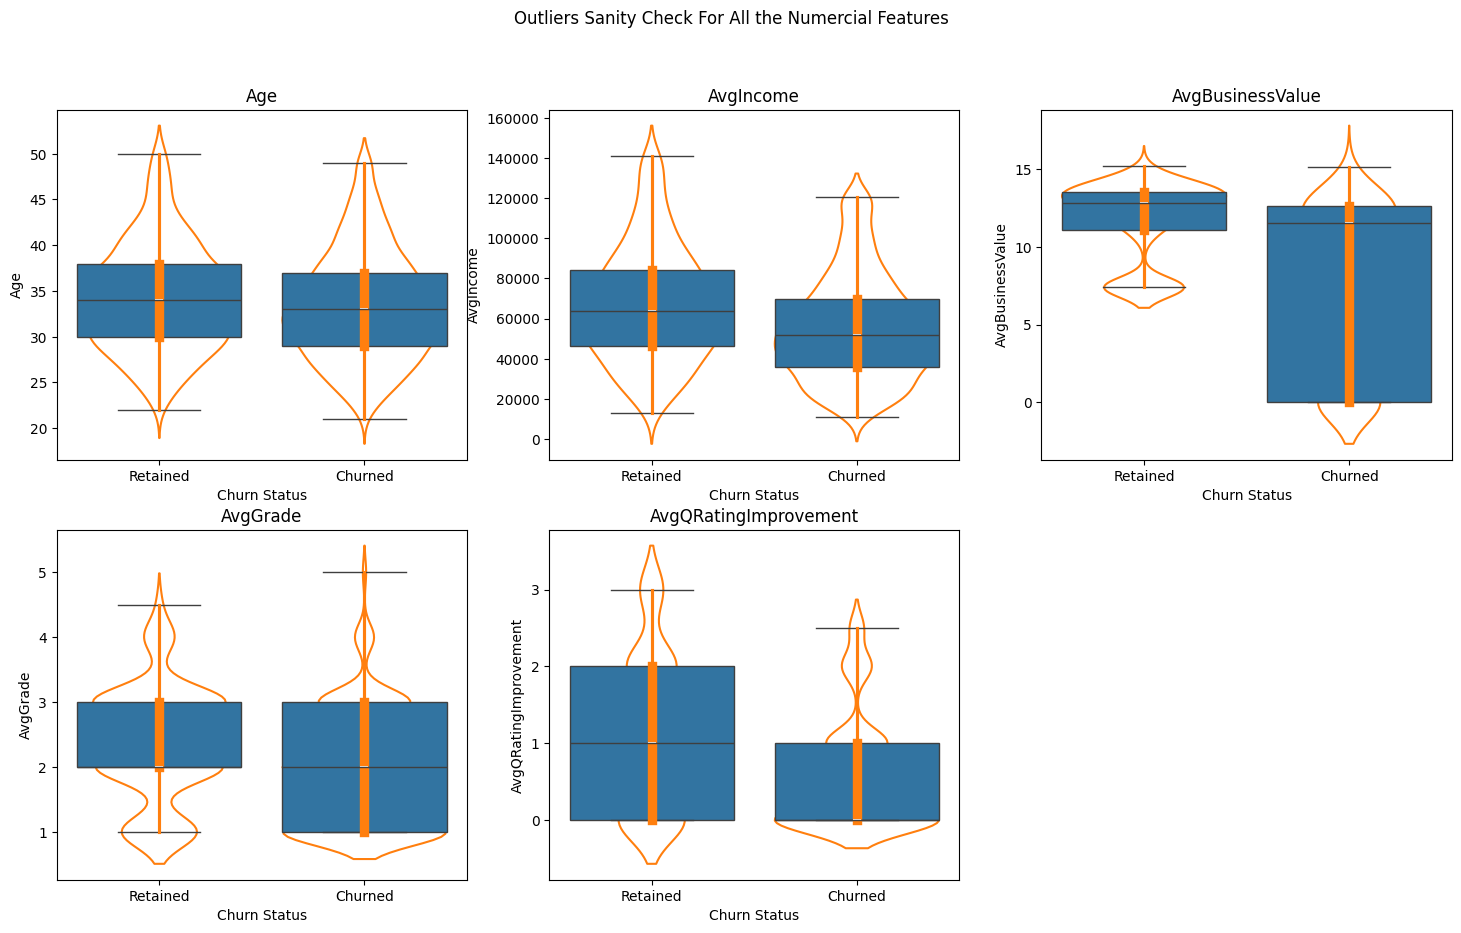

In [ ]:
# warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.figure(figsize=(18,10))
plt.suptitle('Outliers Sanity Check For All the Numercial Features')
for i in range(len(otliers_treated_numeric_features)):
  plt.subplot(2,3,i+1)
  plt.title(otliers_treated_numeric_features[i])
  sns.boxplot(y=otliers_treated_numeric_features[i], x='Churn', data=df)
  sns.violinplot(y=otliers_treated_numeric_features[i], x='Churn', data=df, fill=False)
  plt.xticks([0,1],['Retained', 'Churned'])
  plt.xlabel('Churn Status')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   MonthsReported         2381 non-null   int64   
 1   LastReportedMonth      2381 non-null   object  
 2   LastReportedYear       2381 non-null   int32   
 3   JoinedMonth            2381 non-null   object  
 4   JoinedYear             2381 non-null   int32   
 5   Churn                  2381 non-null   category
 6   Age                    2381 non-null   int64   
 7   Gender                 2381 non-null   category
 8   City                   2381 non-null   category
 9   EducationLevel         2381 non-null   category
 10  AvgIncome              2381 non-null   float64 
 11  Increment              2381 non-null   category
 12  JoiningDesignation     2381 non-null   category
 13  AvgGrade               2381 non-null   float64 
 14  AvgBusinessValue       2381 non-null   float6

##<font color="#9e1d73"><span><b>Checking Target Class Imbalance</b></span>
*   Check Class Distribution



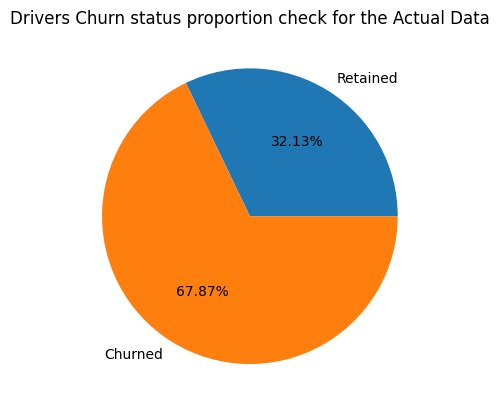

count  Percent
Churn                   
Retained    765    32.13
Churned    1616    67.87

In [ ]:
pie_args= {
    'labels':['Retained', 'Churned'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Drivers Churn status proportion check for the Actual Data',
            'show':None}

pieplot(df, plt_args, feature='Churn')

<font color = 'blue'>Observation :</font>

From the above plot it's clear that dataset is imbalance w.r.t target.

#<font color="#b7cd26"><span><b>Data Pre-processing Pipeline:</b></span></font>

* <font color = 'magenta'>train_test_val_split :</font> Splits the processed data into three parts: training, validation, and test sets..
* <font color = 'magenta'>one_hot_encoding :</font> one-hot encoding creates separate binary features for each unique category and is often suitable for a small number of categories.
* <font color = 'magenta'>ordinal_encoding :</font> ordinal encoding is suitable when the categories have a ranked order.
* <font color = 'magenta'>target_feature_encoding:</font> Converting the target variable (label) into a numerical format if it’s categorical, to make it suitable for model training.
* <font color = 'magenta'>nominal_encoding:</font> Encoding technique used for categorical features without any inherent order, typically using methods like one-hot encoding to represent each category as a separate binary feature.
* <font color = 'magenta'>fix_imbalance_data:</font> Techniques used to address class imbalance in the dataset, such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE.
* <font color = 'magenta'>scaler_min_max:</font> Scales the data using the Min-Max Scaling techinque.
* <font color = 'magenta'>encode_scale_data:</font> Performs all the above operarions in one go.

In [ ]:
class DataPreprocessing:
  def __init__(self, X, y, ordinal_columns=None, nominal_columns=None, one_hot_encoding_columns=None, target_values_dict=None, split=False, val_split=False):
        self.X = X
        self.y = y
        self.ordinal_columns = ordinal_columns
        self.nominal_columns = nominal_columns
        self.target_values_dict = target_values_dict
        self.split = split
        self.val_split = val_split
        self.one_hot_encoding_columns = one_hot_encoding_columns
        self.data_train = None
        self.data_test = None
        self.data_val = None
        self.data_target_train = None
        self.data_target_test = None
        self.data_target_val = None
        self.data_X = X
        self.data_y = y

  def train_test_val_split(self):
    if self.val_split:
      X_tr_cv, self.data_test, y_tr_cv, self.data_target_test = train_test_split(self.X, self.y, test_size=0.2, random_state=1)
      self.data_train, self.data_val, self.data_target_train, self.data_target_val  = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
    else:
      self.data_train, self.data_test, self.data_target_train,self.data_target_test =  train_test_split(self.X, self.y, test_size=0.3, random_state=42)

  def one_hot_encoding(self, prefix=None, dtype='int'):
    for i in self.one_hot_encoding_columns:
      if self.split:
        data_train_dummies = pd.get_dummies(self.data_train[i], prefix=i, dtype=dtype)
        self.data_train = pd.concat([self.data_train, data_train_dummies], axis=1).drop(columns=i)

        data_test_dummies = pd.get_dummies(self.data_test[i], prefix=i, dtype=dtype)
        self.data_test = pd.concat([self.data_test, data_test_dummies], axis=1).drop(columns=i)

        if self.val_split:
            data_val_dummies = pd.get_dummies(self.data_val[i], prefix=i, dtype=dtype)
            self.data_val = pd.concat([self.data_val, data_val_dummies], axis=1).drop(columns=i)
      else:
        data_dummies = pd.get_dummies(self.data_X[i], prefix=i, dtype=dtype)
        self.data_X = pd.concat([self.data_X, data_dummies], axis=1).drop(columns=i)

  def ordinal_encoding(self):

    encoder = OrdinalEncoder(categories=[self.ordinal_columns[col] for col in self.ordinal_columns.keys()])
    if self.split:
      data_train_encoded = encoder.fit_transform(self.data_train[self.ordinal_columns.keys()])
      self.data_train.loc[:,self.ordinal_columns.keys()] = data_train_encoded

      data_test_encoded = encoder.transform(self.data_test[self.ordinal_columns.keys()])
      self.data_test.loc[:,self.ordinal_columns.keys()] = data_test_encoded

      if self.val_split:
        data_val_encoded = encoder.transform(self.data_val[self.ordinal_columns.keys()])
        self.data_val.loc[:,self.ordinal_columns.keys()] = data_val_encoded
    else:
      data_encoded = encoder.fit_transform(self.data_X[self.ordinal_columns.keys()])
      self.data_X.loc[:,self.ordinal_columns.keys()] = data_encoded


  def target_feature_encoding(self):

    if self.split:
      self.data_target_train = self.data_target_train.map(self.target_values_dict)
      self.data_target_test = self.data_target_test.map(self.target_values_dict)
      if self.val_split:
        self.data_target_val = self.data_target_val.map(self.target_values_dict)
    else:
      self.data_y = self.data_y.map(self.target_values_dict)


  def nominal_encoding(self):
    target_encoder = ce.TargetEncoder()
    if self.split:
      data_train_encoded_col = target_encoder.fit_transform(self.data_train[self.nominal_columns], self.data_target_train)
      self.data_train[self.nominal_columns] = data_train_encoded_col

      data_test_encoded_col = target_encoder.transform(self.data_test[self.nominal_columns])
      self.data_test[self.nominal_columns] = data_test_encoded_col

      if self.val_split:

        data_val_encoded_col = target_encoder.transform(self.data_val[self.nominal_columns])
        self.data_val[self.nominal_columns] = data_val_encoded_col
    else:
      data_encoded_col = target_encoder.fit_transform(self.data_X[self.nominal_columns], self.data_y)
      self.data_X[self.nominal_columns] = data_encoded_col

  def fix_imbalance_data(self):
    smote = SMOTE(random_state=42)

    if self.split:
      self.data_train, self.data_target_train =  smote.fit_resample(self.data_train, self.data_target_train)
    else:
      self.data_X, self.data_y =  smote.fit_resample(self.data_X, self.data_y)


  def scaler_min_max(self):
    scaler  = MinMaxScaler()

    if self.split:
      data_train_scaled  = scaler.fit_transform(self.data_train)
      self.data_train = pd.DataFrame(data_train_scaled, columns=self.data_train.columns)

      data_test_scaled = scaler.transform(self.data_test)
      self.data_test = pd.DataFrame(data_test_scaled, columns=self.data_train.columns)

      if self.val_split:
        data_val_scaled = scaler.transform(self.data_val)
        self.data_val = pd.DataFrame(data_val_scaled, columns=self.data_train.columns)
    else:
      data_scaled  = scaler.fit_transform(self.data_X)
      self.data_X = pd.DataFrame(data_scaled, columns=self.data_X.columns)



  def encode_scale_data(self):
      if self.split:
        self.train_test_val_split()
      if self.one_hot_encoding_columns:
        self.one_hot_encoding()
      if self.ordinal_columns:
        self.ordinal_encoding()
      if self.target_values_dict:
        self.target_feature_encoding()
      if self.nominal_columns:
        self.nominal_encoding()
      self.fix_imbalance_data()
      self.scaler_min_max()

      if self.split:
        if self.val_split:
          return self.data_train, self.data_test, self.data_val, self.data_target_train, self.data_target_test, self.data_target_val
        else:
          return self.data_train, self.data_test, self.data_target_train, self.data_target_test
      else:
        return self.data_X, self.data_y

In [ ]:
print_unique_values(df, cat_obj_features)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Churn:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Gender:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
City:
Length :  29
Values :  ['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
EducationLevel:
Length :  3
Values :  [0 1 2]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Increment:
Length :  2
Values :  [0 1]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
JoiningDesignation:
Length :  5
Values :

In [ ]:
df.columns

Index(['MonthsReported', 'LastReportedMonth', 'LastReportedYear',
       'JoinedMonth', 'JoinedYear', 'Churn', 'Age', 'Gender', 'City',
       'EducationLevel', 'AvgIncome', 'Increment', 'JoiningDesignation',
       'AvgGrade', 'AvgBusinessValue', 'AvgQRatingImprovement'],
      dtype='object', name='Features')

##<font color="#9e1d73"><span><b>Splitting(Train,Test), Encoding, Balancing and Scaling the data</b></font>

In [ ]:
df.head()

Features   MonthsReported LastReportedMonth  LastReportedYear JoinedMonth  \
Driver_ID                                                                   
1                       3               Mar              2019         Dec   
2                       2               Dec              2020         Nov   
4                       5               Dec              2020         Dec   
5                       3               Mar              2019         Jan   
6                       5               Dec              2020         Jul   

Features   JoinedYear Churn  Age Gender City EducationLevel  AvgIncome  \
Driver_ID                                                                
1                2018     1   28      0  C23              2    57387.0   
2                2020     0   31      0   C7              2    67016.0   
4                2019     1   43      0  C13              2    65603.0   
5                2019     1   29      0   C9              0    46368.0   
6                2020     0   31      1  C11              1    78728.0   

Features  Increment JoiningDesignation  AvgGrade  AvgBusinessValue  \
Driver_ID                                                            
1                 0                  1       1.0         13.256651   
2                 0                  2       2.0          7.396193   
4                 0                  2       2.0         11.156265   
5                 0                  1       1.0         10.599655   
6                 0                  3       3.0         12.441149   

Features   AvgQRatingImprovement  
Driver_ID                         
1                            0.0  
2                            0.0  
4                            0.0  
5                            0.0  
6                            1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   MonthsReported         2381 non-null   int64   
 1   LastReportedMonth      2381 non-null   object  
 2   LastReportedYear       2381 non-null   int32   
 3   JoinedMonth            2381 non-null   object  
 4   JoinedYear             2381 non-null   int32   
 5   Churn                  2381 non-null   category
 6   Age                    2381 non-null   int64   
 7   Gender                 2381 non-null   category
 8   City                   2381 non-null   category
 9   EducationLevel         2381 non-null   category
 10  AvgIncome              2381 non-null   float64 
 11  Increment              2381 non-null   category
 12  JoiningDesignation     2381 non-null   category
 13  AvgGrade               2381 non-null   float64 
 14  AvgBusinessValue       2381 non-null   float6

In [ ]:
df = df.astype({'Churn':'int', 'Gender':'int', 'EducationLevel':'int', 'JoiningDesignation':'int', 'Increment':'int'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   MonthsReported         2381 non-null   int64   
 1   LastReportedMonth      2381 non-null   object  
 2   LastReportedYear       2381 non-null   int32   
 3   JoinedMonth            2381 non-null   object  
 4   JoinedYear             2381 non-null   int32   
 5   Churn                  2381 non-null   int64   
 6   Age                    2381 non-null   int64   
 7   Gender                 2381 non-null   int64   
 8   City                   2381 non-null   category
 9   EducationLevel         2381 non-null   int64   
 10  AvgIncome              2381 non-null   float64 
 11  Increment              2381 non-null   int64   
 12  JoiningDesignation     2381 non-null   int64   
 13  AvgGrade               2381 non-null   float64 
 14  AvgBusinessValue       2381 non-null   float6

In [ ]:
df.nunique()

Features
MonthsReported             24
LastReportedMonth          12
LastReportedYear            2
JoinedMonth                12
JoinedYear                  8
Churn                       2
Age                        30
Gender                      2
City                       29
EducationLevel              3
AvgIncome                2291
Increment                   2
JoiningDesignation          5
AvgGrade                   29
AvgBusinessValue         1630
AvgQRatingImprovement       5
dtype: int64

##<font color="#9e1d73"><span><b>Saving the processed data to pickle file</b></span>

In [ ]:
X = df.drop('Churn', axis=1)
y= df.loc[:,'Churn']

with open("ola.pkl", "wb") as f:
    pickle.dump((X, y), f)

In [ ]:
ordinal_columns = {
    'LastReportedMonth': [calendar.month_abbr[i] for i in range(1, 13)],
    'JoinedMonth' : [calendar.month_abbr[i] for i in range(1, 13)]
    }

nominal_columns = ['City']

one_hot_encoding_columns = ['LastReportedYear','Gender', 'Increment']


preprocess_train_test = DataPreprocessing(X,y, ordinal_columns = ordinal_columns, nominal_columns=nominal_columns, one_hot_encoding_columns=one_hot_encoding_columns, split=True)

X_train, X_test, y_train, y_test = preprocess_train_test.encode_scale_data()

##<font color="#9e1d73"><span><b>Sanity checks</b></font>


###<font color="3a86a2"><span><b>Shape of the data after spliting</b></font>

In [ ]:
print(Fore.BLUE, 'Shape of X_train :', Fore.BLACK, X_train.shape)
print(Fore.BLUE, 'Shape of X_test :', Fore.BLACK, X_test.shape)
print(Fore.BLUE, 'Shape of y_train :', Fore.BLACK, y_train.shape)
print(Fore.BLUE, 'Shape of y_test :', Fore.BLACK, y_test.shape)

 Shape of X_train :  (2268, 18)
 Shape of X_test :  (715, 18)
 Shape of y_train :  (2268,)
 Shape of y_test :  (715,)


<font color = 'blue'>Observation :  
  </font> Data has splitted into train and test.

###<font color="3a86a2"><span><b>Data Imbalance sanity check</b></span>

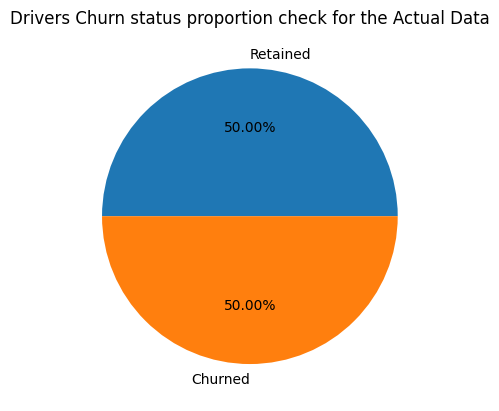

count  Percent
Churn                   
Retained   1134     50.0
Churned    1134     50.0

In [ ]:
pie_args= {
    'labels':['Retained', 'Churned'],
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Drivers Churn status proportion check for the Actual Data',
            'show':None}

pieplot(y_train, plt_args)

<font color = 'blue'>Observation :  
  </font> After applying the SMOTE technique, the data is balanced

###<font color="3a86a2"><span><b>Encoded & Scaled data sanity check</b></span>

In [ ]:
X_train.head()

MonthsReported  LastReportedMonth  JoinedMonth  JoinedYear       Age  \
0        0.347826           1.000000     0.272727    1.000000  0.586207   
1        0.130435           0.272727     0.272727    0.428571  0.689655   
2        0.000000           0.000000     0.363636    0.714286  0.689655   
3        0.347826           0.727273     0.363636    0.285714  0.724138   
4        0.739130           1.000000     0.181818    0.857143  0.413793   

       City  EducationLevel  AvgIncome  JoiningDesignation  AvgGrade  \
0  0.212560             0.0   0.507614                0.50      0.50   
1  0.799032             1.0   0.444863                0.00      0.50   
2  0.466031             0.5   0.034159                0.00      0.00   
3  0.784937             0.0   0.120834                0.25      0.25   
4  0.748947             1.0   0.842975                0.00      0.75   

   AvgBusinessValue  AvgQRatingImprovement  LastReportedYear_2019  \
0          0.857233               0.000000                    0.0   
1          0.876660               0.000000                    1.0   
2          0.000000               0.000000                    1.0   
3          0.865177               0.666667                    1.0   
4          0.963263               0.833333                    0.0   

   LastReportedYear_2020  Gender_0  Gender_1  Increment_0  Increment_1  
0                    1.0       0.0       1.0          1.0          0.0  
1                    0.0       1.0       0.0          1.0          0.0  
2                    0.0       1.0       0.0          1.0          0.0  
3                    0.0       0.0       1.0          1.0          0.0  
4                    1.0       0.0       1.0          1.0          0.0

In [ ]:
X_test.head()

MonthsReported  LastReportedMonth  JoinedMonth  JoinedYear       Age  \
0        0.173913           1.000000     0.909091    0.857143  0.517241   
1        0.173913           0.363636     0.272727    0.428571  0.206897   
2        0.043478           1.000000     0.909091    1.000000  0.275862   
3        0.130435           1.000000     0.818182    0.857143  0.344828   
4        0.217391           1.000000     0.909091    0.857143  0.482759   

       City  EducationLevel  AvgIncome  JoiningDesignation  AvgGrade  \
0  0.212560             1.0   0.374768                0.25      0.25   
1  0.000000             1.0   0.512328                0.00      0.50   
2  0.638951             0.5   0.355574                0.25      0.25   
3  0.212560             1.0   0.156701                0.00      0.00   
4  0.000000             1.0   0.223597                0.00      0.00   

   AvgBusinessValue  AvgQRatingImprovement  LastReportedYear_2019  \
0          0.494201                    0.0                    0.0   
1          0.840199                    0.0                    1.0   
2          0.494201                    0.0                    0.0   
3          0.000000                    0.0                    0.0   
4          0.733260                    0.0                    0.0   

   LastReportedYear_2020  Gender_0  Gender_1  Increment_0  Increment_1  
0                    1.0       1.0       0.0          1.0          0.0  
1                    0.0       0.0       1.0          1.0          0.0  
2                    1.0       1.0       0.0          1.0          0.0  
3                    1.0       1.0       0.0          1.0          0.0  
4                    1.0       1.0       0.0          1.0          0.0

In [ ]:

y_train.head()

0    0
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [ ]:
y_test.head()

Driver_ID
1663    0
1264    1
1618    0
2351    1
1300    1
Name: Churn, dtype: int64

#<font color="#b7cd26"><span><b>Modelling using Decision Tree</b></span></font>


##<font color="#9e1d73"><span><b>Modeling training without hyperpameter tuning</b></font>

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

###<font color="3a86a2"><span><b>Model Training Accuracy</b></span>

In [ ]:
print(Fore.BLUE+'Train accuracy', Fore.BLACK, round(model.score(X_train, y_train),2))

Train accuracy  1.0


###<font color="3a86a2"><span><b>Model Testing Accuracy</b></span>

In [ ]:
print(Fore.BLUE+'Test accuracy', Fore.BLACK,round(model.score(X_test,  y_test),2))

Test accuracy  0.94


###<font color="3a86a2"><span><b>Visualzing Decision Tree</b></span>

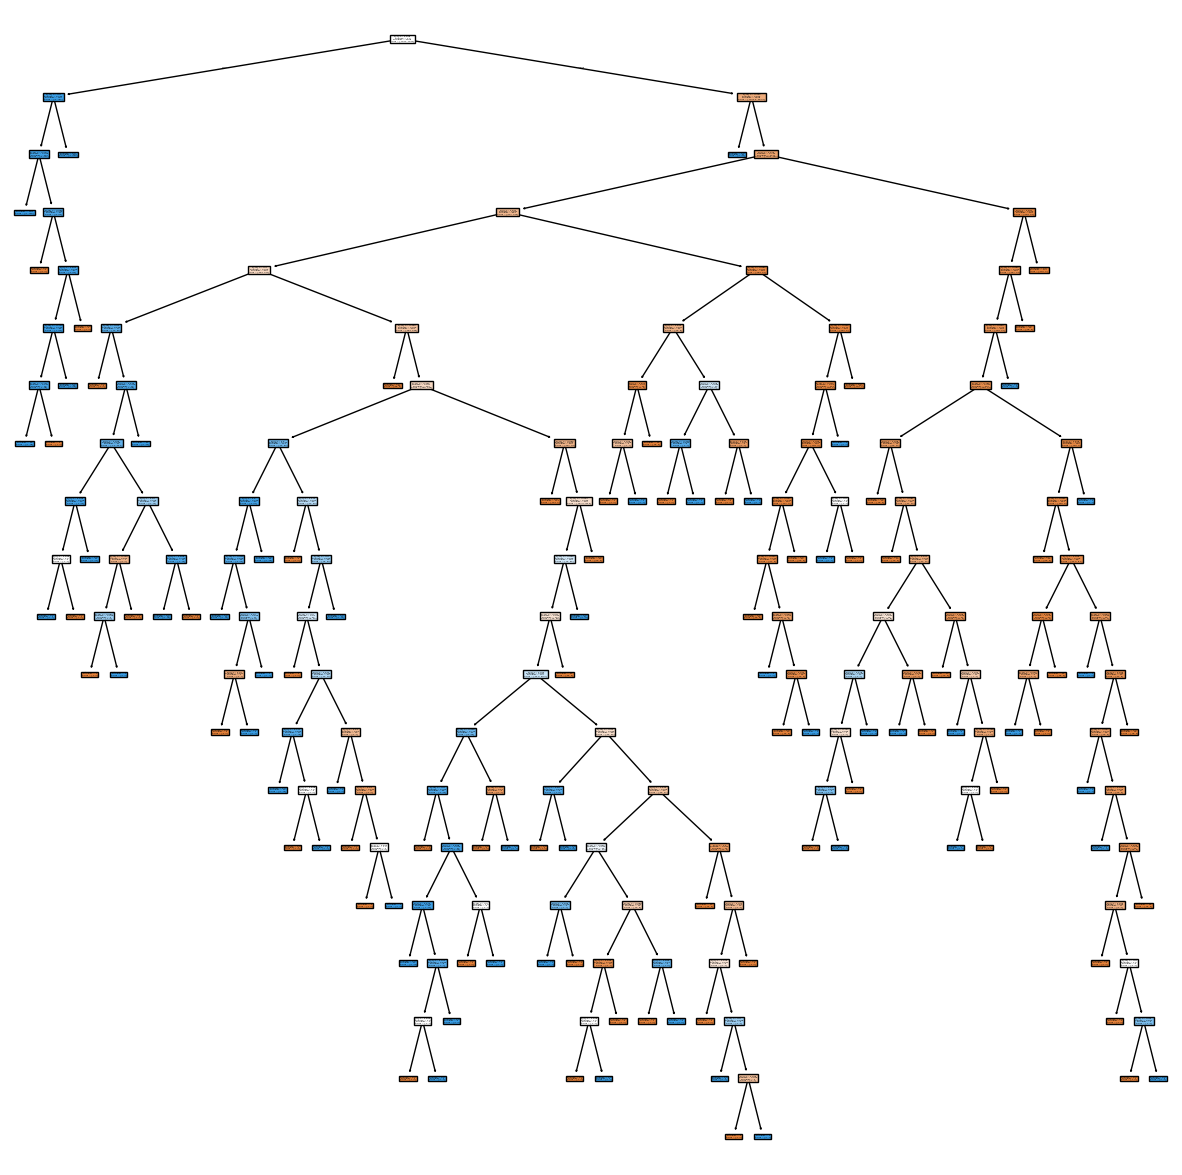

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(model, filled=True)
plt.show()

##<font color="#9e1d73"><span><b>Hyperparameter tuning</b></font>

###<font color="3a86a2"><span><b>Selecting the best tree depth</b></span>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
depths = [3, 4, 5, 7, 9, 11, 13, 15,17, 19,21]

results = []

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)
    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv=kfold,
                                    scoring='accuracy', return_train_score=True)

    results.append([
        depth,
        round(cv_acc_results['train_score'].mean() * 100, 2),
        round(cv_acc_results['train_score'].std() * 100, 2),
        round(cv_acc_results['test_score'].mean() * 100, 2),
        round(cv_acc_results['test_score'].std() * 100, 2),
    ])

columns = ["Depth", "Train Accuracy Mean", "Train Accuracy Std", "Validation Accuracy Mean", "Validation Accuracy Std"]
df = pd.DataFrame(results, columns=columns)
df.set_index('Depth', inplace=True)

def highlight_condition(row):
  if np.abs(row[0]-row[2]) <= 3:
    return ['background-color: lightblue' for i in range(len(row))]
  else:
    return ['' for i in range(len(row))]

styled_df = df.style.apply(highlight_condition, axis=1)
styled_df

##<font color="#9e1d73"><span><b>Modeling after hyperpameter tuning</b></font>

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=5)
tree_clf=tree_clf.fit(X_train, y_train)
tree_clf

DecisionTreeClassifier(max_depth=5, random_state=7)

###<font color="3a86a2"><span><b>Model Training Accuracy</b></span>

In [ ]:
print(Fore.BLUE+'Train accuracy', Fore.BLACK,round(tree_clf.score(X_train, y_train),2))

Train accuracy  0.9


###<font color="3a86a2"><span><b>Model Testing Accuracy</b></span>

In [ ]:
pred = tree_clf.predict(X_test)
print(Fore.BLUE+'Test accuracy', Fore.BLACK, round(tree_clf.score(X_test,  y_test),2))

Test accuracy  0.86


###<font color="3a86a2"><span><b>Visualzing Decision Tree</b></span>

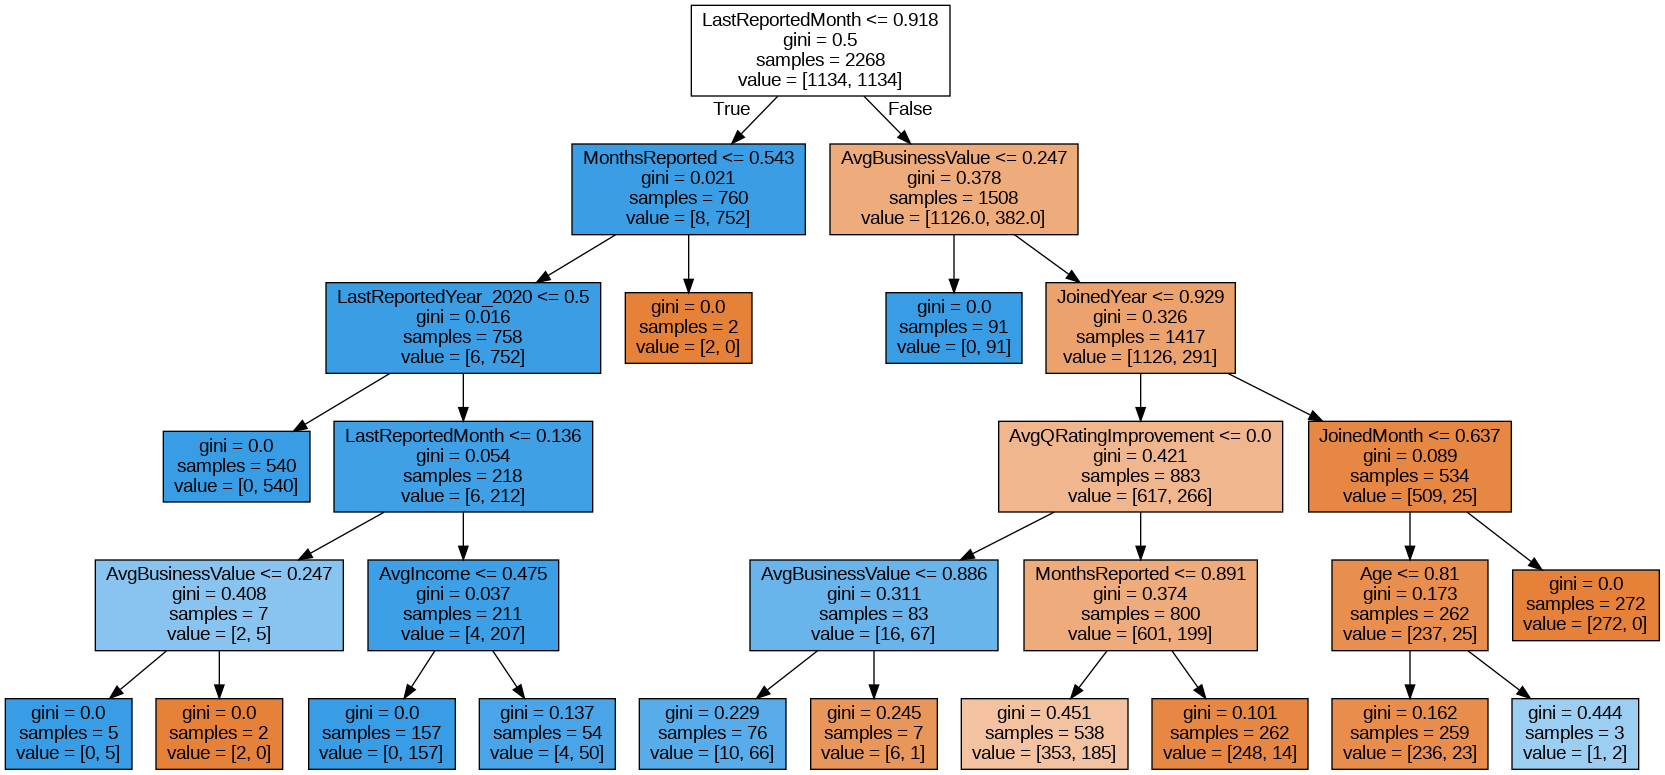

In [ ]:
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


###<font color="3a86a2"><span><b>ROC AUC Curve</b></span>

In [ ]:
probability = tree_clf.predict_proba(X_test)
probability

array([[0.13157895, 0.86842105],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.94656489, 0.05343511],
       [0.65613383, 0.34386617]])

In [ ]:
class1_propbabilities = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,class1_propbabilities)

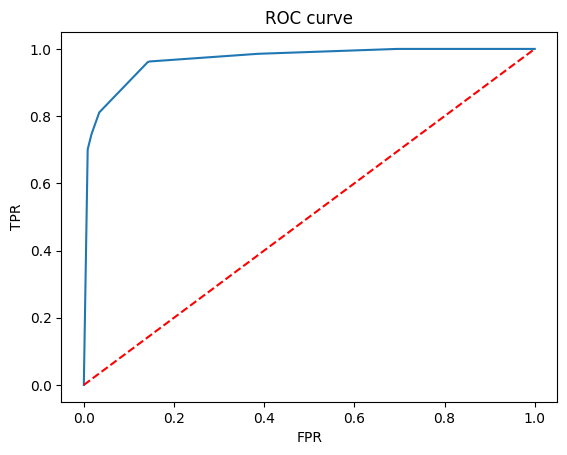

In [ ]:
plt.plot(fpr,tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###<font color="#3a86a2"><span><b>Precision Recall Curve</b></span></font>

In [ ]:
roc_auc_score(y_test,class1_propbabilities)

0.9673793029757982

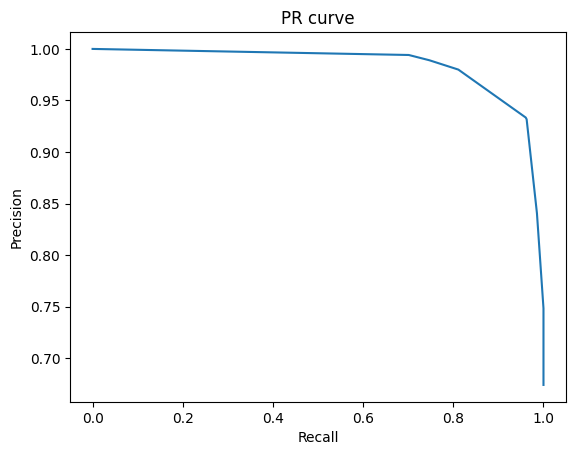

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, class1_propbabilities)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

###<font color="3a86a2"><span><b>Confusion metrics</b></span>

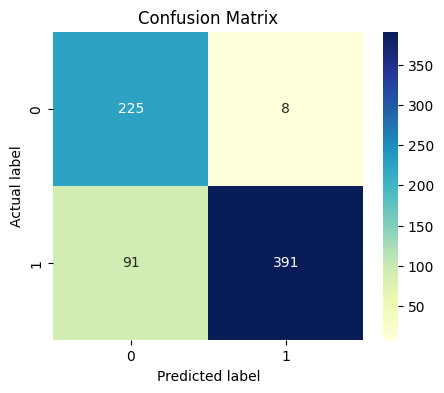

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

###<font color="3a86a2"><span><b>Important features</b></span>

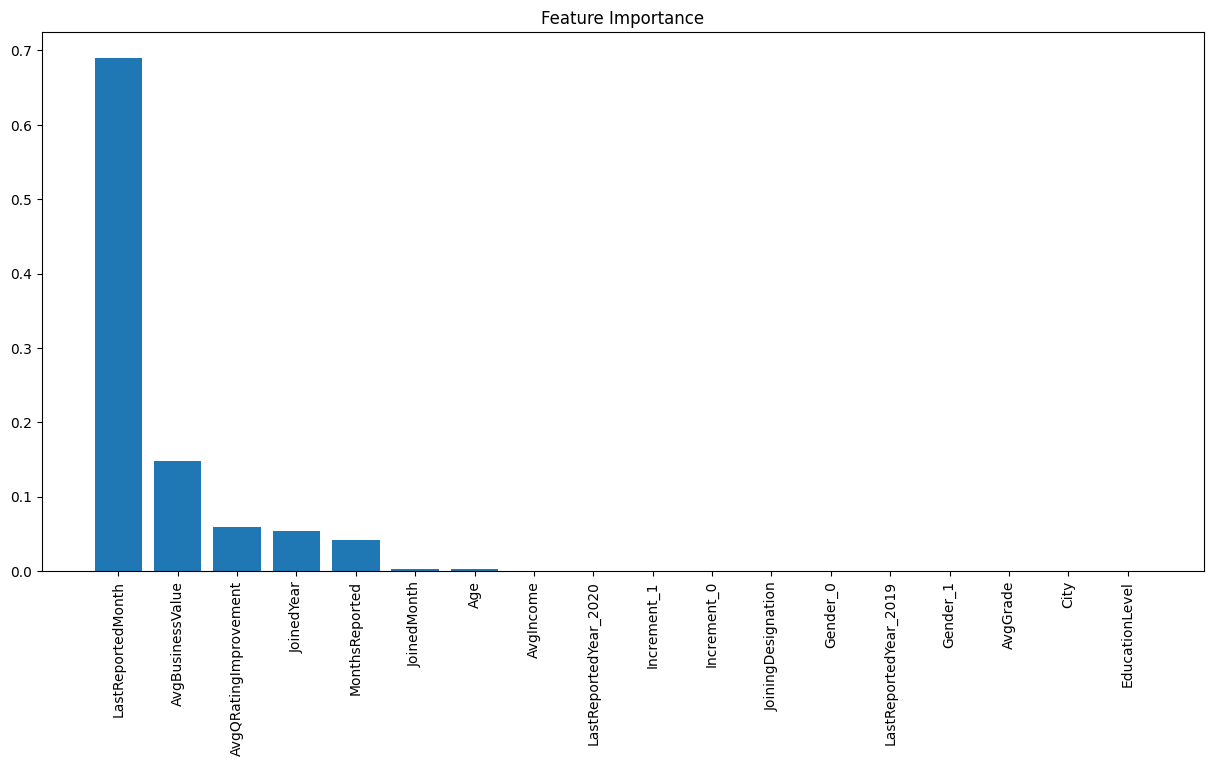

Feature  Coefficient
0      LastReportedMonth     0.690156
1       AvgBusinessValue     0.147919
2  AvgQRatingImprovement     0.059005
3             JoinedYear     0.054192
4         MonthsReported     0.042329
5            JoinedMonth     0.003057
6                    Age     0.002491
7              AvgIncome     0.000555
8  LastReportedYear_2020     0.000296
9                   City     0.000000

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

#<font color="#b7cd26"><span><b>Modeling using Random-Forest</b></font>

##<font color="9e1d73"><span><b>Re-loading the pickled data</b></span>

In [ ]:
with open("ola.pkl", "rb") as f:
    X, y = pickle.load(f)

##<font color="#9e1d73"><span><b>Splitting(Train,Test), Encoding, Balancing and Scaling the data</b></font>

In [ ]:
ordinal_columns = {
    'LastReportedMonth': [calendar.month_abbr[i] for i in range(1, 13)],
    'JoinedMonth' : [calendar.month_abbr[i] for i in range(1, 13)]
    }

nominal_columns = ['City']

one_hot_encoding_columns = ['LastReportedYear','Gender', 'Increment']


preprocess_data = DataPreprocessing(X,y, ordinal_columns = ordinal_columns, nominal_columns=nominal_columns, one_hot_encoding_columns=one_hot_encoding_columns)


_X,_y = preprocess_data.encode_scale_data()

##<font color="9e1d73"><span><b>Sanity checks</b></span>

In [ ]:
_X.head()

MonthsReported  LastReportedMonth  JoinedMonth  JoinedYear       Age  \
0        0.086957           0.181818     1.000000    0.714286  0.241379   
1        0.043478           1.000000     0.909091    1.000000  0.344828   
2        0.173913           1.000000     1.000000    0.857143  0.758621   
3        0.086957           0.181818     0.000000    0.857143  0.275862   
4        0.173913           1.000000     0.545455    1.000000  0.344828   

       City  EducationLevel  AvgIncome  JoiningDesignation  AvgGrade  \
0  0.837728             1.0   0.358665                0.00      0.00   
1  0.536863             1.0   0.432713                0.25      0.25   
2  1.000000             1.0   0.421847                0.25      0.25   
3  0.615400             0.0   0.273928                0.00      0.00   
4  0.602321             0.5   0.522779                0.50      0.50   

   AvgBusinessValue  AvgQRatingImprovement  LastReportedYear_2019  \
0          0.872446               0.000000                    1.0   
1          0.486758               0.000000                    0.0   
2          0.734215               0.000000                    0.0   
3          0.697584               0.000000                    1.0   
4          0.818776               0.333333                    0.0   

   LastReportedYear_2020  Gender_0  Gender_1  Increment_0  Increment_1  
0                    0.0       1.0       0.0          1.0          0.0  
1                    1.0       1.0       0.0          1.0          0.0  
2                    1.0       1.0       0.0          1.0          0.0  
3                    0.0       1.0       0.0          1.0          0.0  
4                    1.0       0.0       1.0          1.0          0.0

In [ ]:
_y.head()

0    1
1    0
2    1
3    1
4    0
Name: Churn, dtype: int64

##<font color="9e1d73"><span><b>K-Fold Validation with 10 splits before Hyperparameter tuing</b></span>

In [ ]:
rf_clf = RandomForestClassifier(random_state=7, max_depth=5, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, _X, _y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 88.80 
 Validation: 87.97
K-Fold Accuracy Std: 
 Train: 0.37, 
 Validation: 5.80


##<font color="9e1d73"><span><b>Hyperparameter tuning </b></span>

In [ ]:
params = {
          'n_estimators' : [100, 250, 350, 400],
          'max_depth' : [8,30, 15, 20],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10,12]
         }

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

%timeit -n 1 -r 1 grid.fit(_X, _y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

27min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 12, 'n_estimators': 100}
Best score:  0.9535908226716027


##<font color="9e1d73"><span><b>K-Fold Validation with 10 splits after hyperparameter tuning</b></span>

In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='entropy',
                              max_depth=20, max_features=8, n_estimators=350)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, _X, _y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 100.000 
 Validation: 95.607
K-Fold Accuracy Std: 
 Train: 0.000, 
 Validation: 1.002


##<font color="9e1d73"><span><b>Hyperparameter tuning for selecting the best cost-complexity pruning</b></span>

In [ ]:
params = {'ccp_alpha': uniform(loc=0, scale=0.4)}

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='entropy',
                                                               max_depth=20, max_features=8, n_estimators=350),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )
random.fit(_X, _y)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'ccp_alpha': 0.02645621730378216}
Best score:  0.892330444459374




```
# This is formatted as code
```

##<font color="9e1d73"><span><b>Model Training</b></span>

In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='entropy',
                              max_depth=20, max_features=8, n_estimators=350, ccp_alpha=0.0005521999003434974)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, _X, _y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 100.000 
 Validation: 95.669
K-Fold Accuracy Std: 
 Train: 0.000, 
 Validation: 0.965


In [ ]:
rf_clf = RandomForestClassifier(random_state=7, bootstrap=True, criterion='entropy',
                                                               max_depth=20, max_features=8, n_estimators=350, ccp_alpha=0.0005521999003434974, oob_score=True)

In [ ]:
rf_clf.fit(_X, _y)


RandomForestClassifier(ccp_alpha=0.0005521999003434974, criterion='entropy',
                       max_depth=20, max_features=8, n_estimators=350,
                       oob_score=True, random_state=7)

In [ ]:
train_score = rf_clf.score(_X, _y)
train_score

1.0

###<font color="3a86a2"><span><b>Important features</b></span>

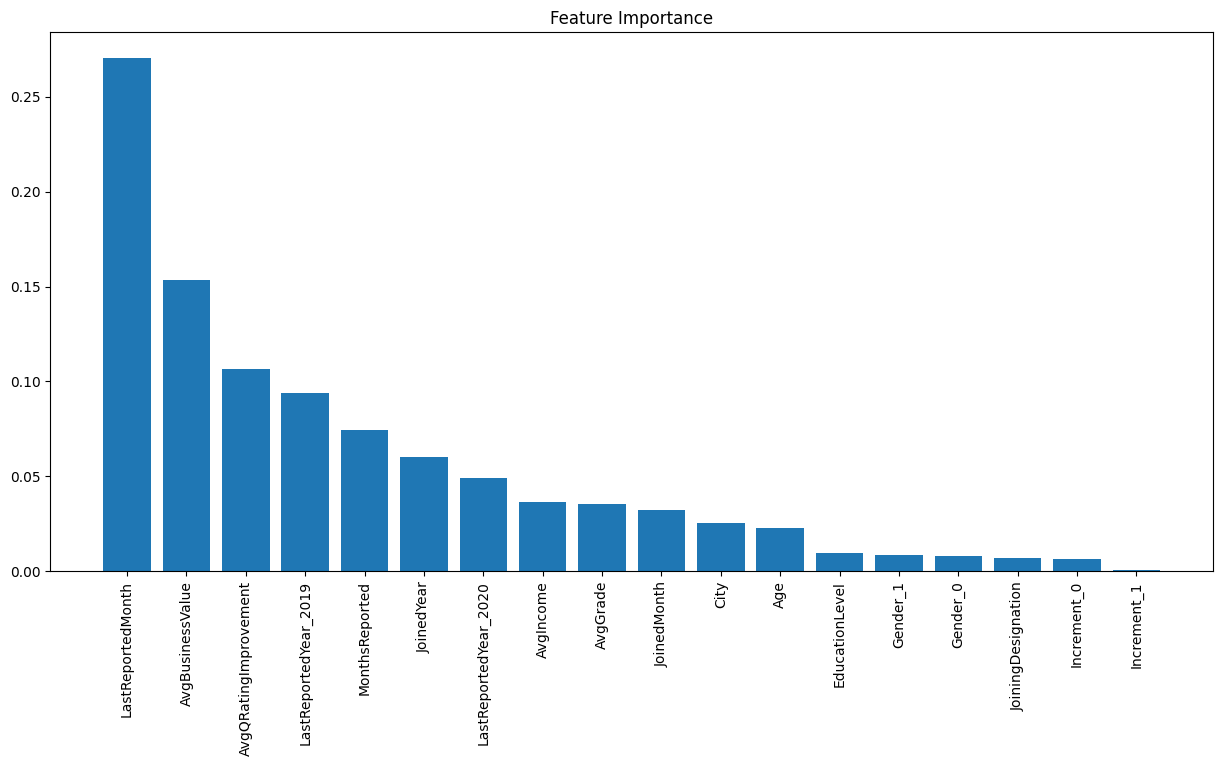

In [ ]:
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1]
names = [_X.columns[i] for i in indices]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(_X.shape[1]), importances[indices])
plt.xticks(range(_X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
oob_probabilities = rf_clf.oob_decision_function_

if oob_probabilities.shape[1] == 2:
    oob_prob = oob_probabilities[:, 1]
else:
    raise ValueError("ROC and Precision-Recall curves require a binary classification problem.")

###<font color="3a86a2"><span><b>ROC AUC curve</b></span>

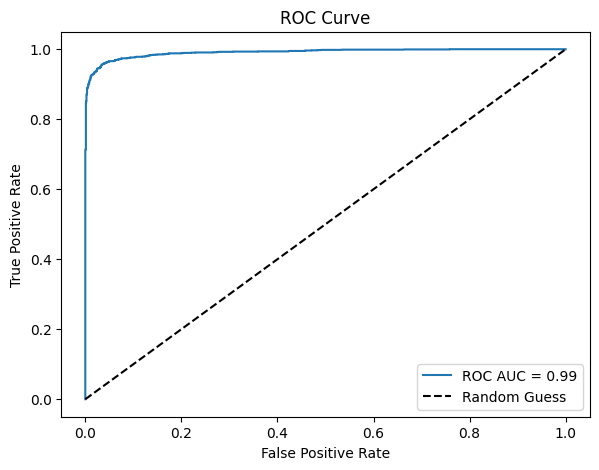

In [ ]:
oob_pred = (oob_prob > 0.5).astype(int)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(_y, oob_prob)
roc_auc = roc_auc_score(_y, oob_prob)

plt.figure(figsize=(15, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###<font color="3a86a2"><span><b>Precision Recall Curve</b></span>

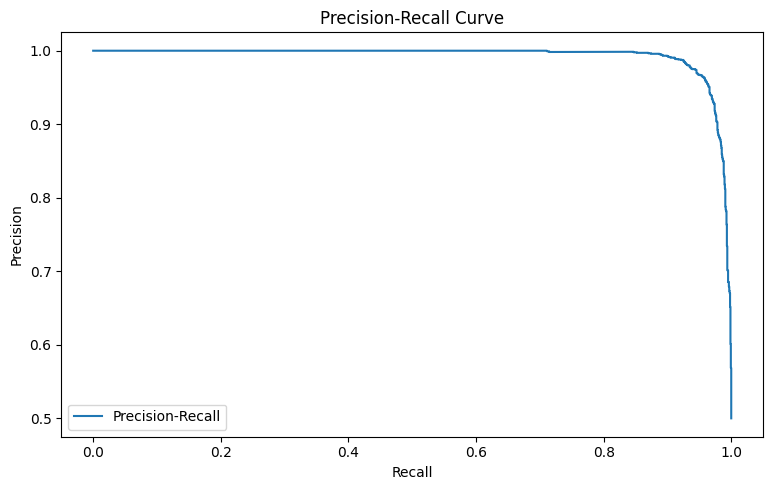

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(_y, oob_prob)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label="Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()

###<font color="3a86a2"><span><b>Confusion Matrix</b></span>

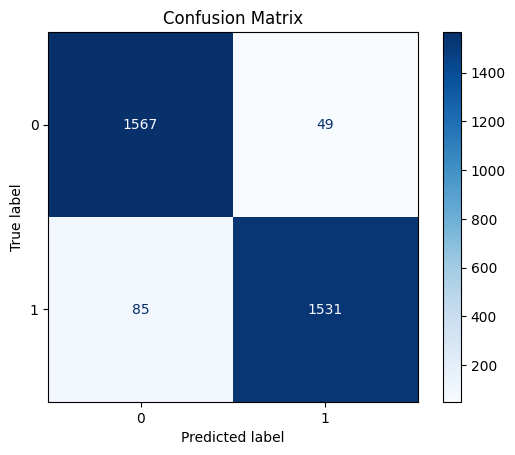

Accuracy: 0.96


In [ ]:
# Confusion Matrix
cm = confusion_matrix(_y, oob_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print accuracy as an additional metric
print(f"Accuracy: {accuracy_score(_y, oob_pred):.2f}")

#<font color="#b7cd26"><span><b>Gradient Boosting Descision Tree</b></font>

##<font color="9e1d73"><span><b>Modeling before Hyperparameter tuning </b></span>

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(X_train, y_train)

0.972663139329806

In [ ]:
gbc.score(X_test, y_test)

0.9468531468531468

##<font color="9e1d73"><span><b>Hyperparameter tuning </b></span>

In [ ]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

gbc = GradientBoostingClassifier()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train, y_train)

end = dt.datetime.now()

print('Time taken:', end-start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken: 0:00:25.489431


In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_leaf_nodes=20)


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 200, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.9501763668430335 Rank: 2
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9506172839506174 Rank: 1
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.9338624338624338 Rank: 10
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.939594356261023 Rank: 9
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.9431216931216931 Rank: 8
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.9444444444444445 Rank: 6
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 3, 'learning_rate': 0.3} Mean_score: 0.9444444444444445 Rank: 6
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 4, 'learning_

In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, max_leaf_nodes=40,
                           n_estimators=150)


##<font color="9e1d73"><span><b>Modeling after Hyperparameter tuning </b></span>

In [ ]:
gbc = clf.best_estimator_

gbc.fit(X_train, y_train)

print("Model acc",gbc.score(X_test, y_test))


Model acc 0.9622377622377623


###<font color="3a86a2"><span><b>ROC AUC curve</b></span>

In [ ]:
probability = gbc.predict_proba(X_test)
probability

array([[4.09465136e-01, 5.90534864e-01],
       [3.43232634e-04, 9.99656767e-01],
       [9.99279886e-01, 7.20113627e-04],
       ...,
       [1.89974375e-02, 9.81002563e-01],
       [9.76355986e-01, 2.36440141e-02],
       [6.26344509e-02, 9.37365549e-01]])

In [ ]:
class1_propbabilities = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,class1_propbabilities)

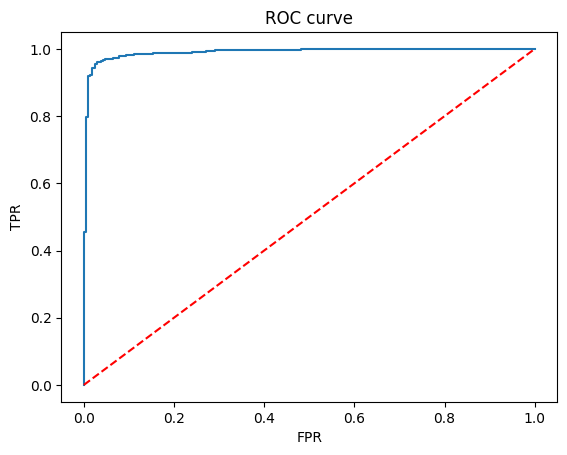

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###<font color="3a86a2"><span><b>Precision Recall Curve</b></span>

In [ ]:
roc_auc_score(y_test,class1_propbabilities)

0.9905971185867185

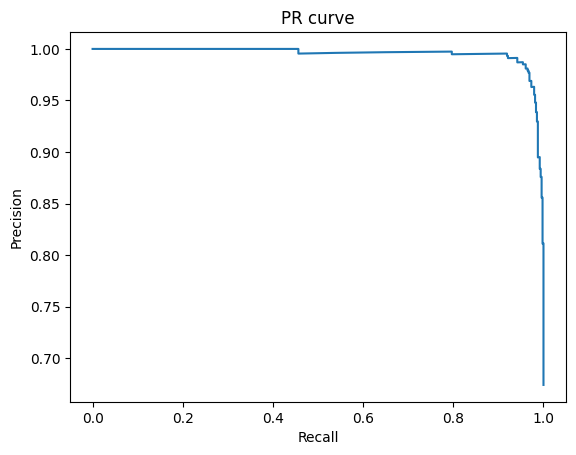

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, class1_propbabilities)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

###<font color="3a86a2"><span><b>Confusion Matrix</b></span>

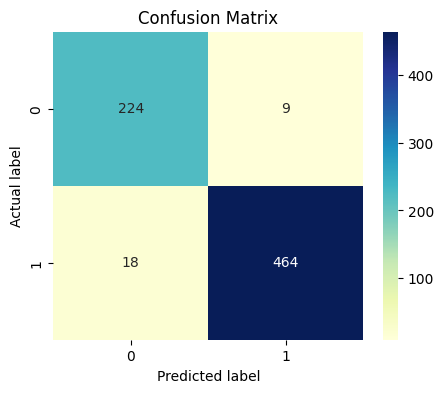

In [ ]:
pred = gbc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,4))

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#<font color="#b7cd26"><span><b>Actionable Insights & Recommendations</b></font>

##<font color="9e1d73"><span><b>Insights:</b></span>

###<font color="3a86a2"><span><b>Precision-Recall Curve:</b></span></font>

* All models show high precision at low recall, indicating that they are good at identifying positive instances with high confidence.
* Gradient Boosting might have a slightly better balance between precision and recall, especially at higher recall levels.

###<font color="3a86a2"><span><b>ROC Curve:</b></span></font>

* All three models demonstrate strong performance, with AUC scores very close to 1. This indicates that the models are highly effective at distinguishing between positive and negative classes.
* Gradient Boosting might have a slightly steeper curve, suggesting potentially better performance at lower false positive rates.

###<font color="3a86a2"><span><b>Confusion Matrix:</b></span></font>

* **Decision Tree:** While the overall accuracy is high, there's a noticeable imbalance in the number of false positives and false negatives. This suggests that the model might be more prone to certain types of errors.

* **Random Forest and Gradient Boosting:** Both models exhibit excellent performance, with high accuracy and low numbers of false positives and false negatives.

###<font color="3a86a2"><span><b>Overall Performance:</b></span></font>

* Gradient Boosting seems to be the top performer, with high accuracy, a strong ROC curve, and a good balance of precision and recall.
* Random Forest also performs well, but might be slightly less accurate than Gradient Boosting.
* Decision Tree has a decent performance, but might be less robust compared to ensemble methods like Random Forest and Gradient Boosting.

##<font color="9e1d73"><span><b>Recommendations for Stakeholders:</b></span>

###<font color="3a86a2"><span><b>Deployment and Monitoring:</b></span></font>


* **Deployment:** Deploy the model into a production environment, ensuring it integrates seamlessly with existing systems and workflows.

* **Monitoring:** Continuously monitor the model's performance in production to identify any degradation or bias.

* **Retraining:** Regularly retrain the model with new data to maintain its accuracy and relevance.

###<font color="3a86a2"><span><b>Model Interpretability:</b></span></font>


* Use techniques like feature importance analysis to understand the factors driving predictions.

* This can help identify key features that influence the model's decisions and aid in decision-making.

###<font color="3a86a2"><span><b>Ethical Considerations:</b></span></font>

* Ensure that the model is fair and unbiased, especially if it is used in decision-making processes with societal implications.

* Consider potential biases in the data and model and take steps to mitigate them.

###<font color="3a86a2"><span><b>User Experience:</b></span></font>

* Design user-friendly interfaces to interact with the model and understand its predictions.

* Provide clear explanations and visualizations of the model's outputs.

###<font color="3a86a2"><span><b>Business Impact:</b></span></font>

* Quantify the impact of the model on business outcomes, such as increased revenue, reduced costs, or improved customer satisfaction.
* Use the model to make data-driven decisions and optimize business processes.